In [1]:
import pickle
import pandas as pd
import numpy as np
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
print ("Packages successfully loaded.")

Packages successfully loaded. In main...


In [ ]:
all_feature_dict = {}
print ("Pickle pre data")
local_path = 'D:\\waiting time\\data\\Regression\\all_data\\'
with open(local_path+'PreInputData.p', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    PreInputData = u.load()
print('Finish!')

In [ ]:
print(PreInputData)
#PreInputData.keys()
PreInputData[32768]

In [2]:
def getBasicFeature(PreInputData):
    fraction_dict = {}
    course_dict = {}
    patient_ser = []
    date_list = []
    duration_zero = []
    for pat in PreInputData.keys():
#        patient_ser.append(pat)
        for cou in PreInputData[pat].keys():
#            course.append(cou)
            for fra in PreInputData[pat][cou].keys():
                for date in PreInputData[pat][cou][fra].keys():
                    date_list.append(date)
                    text = PreInputData[pat][cou][fra][date]
                    pat_duration = text['duration'][0]
                    
                    if pat_duration == 0:
                        duration_zero.append([pat, cou, fra, date])
                    else:
                        
                        patient_ser.append(pat)
                        date_list.append(date)
                        
                        if fra not in fraction_dict.keys():
                            fraction_dict[fra] = [pat_duration]
                        else:
                            fraction_dict[fra].append(pat_duration)
                        
                        if cou not in course_dict.keys():
                            course_dict[cou] = [pat_duration]
                        else:
                            course_dict[cou].append(pat_duration)
    return fraction_dict, course_dict, patient_ser, date_list, duration_zero

In [3]:
def getFeatureDict(PreInputData, name):
    feature_dict = {}
    for pat in PreInputData.keys():
        for cou in PreInputData[pat].keys():
            for fra in PreInputData[pat][cou].keys():
                for date in PreInputData[pat][cou][fra].keys():
                    text = PreInputData[pat][cou][fra][date]
                    pat_duration = text['duration'][0]

                    if pat_duration != 0:
                        if type(text[name]) == list:
                            for i in text[name]:
                                if i not in feature_dict.keys():
                                    feature_dict[i] = [pat_duration]
                                else:
                                    feature_dict[i].append(pat_duration)
                        else:
                            if text[name] not in feature_dict.keys():
                                feature_dict[text[name]] = [pat_duration]
                            else:
                                feature_dict[text[name]].append(pat_duration)
    
    return feature_dict

In [4]:
def getMeanAndStd(feature_dict):
    feature_ave = []
    feature_std = []
    feature_xticks = []
    feature_number = []
    for key in sorted(feature_dict):
        feature_number.append(len(feature_dict[key]))
        feature_xticks.append(key)
        feature_dict[key] = np.array(feature_dict[key])
        feature_ave.append(np.mean(feature_dict[key]))
#        print(type(feature_dict[key]))
        feature_std.append(np.std(feature_dict[key]))
    
    return feature_ave, feature_std, feature_xticks, feature_number

In [15]:
def plotXvsDuration(feature_ave, feature_std, feature_xticks, feature_number, name, local_path = 'Duration_vs_Feature//09-04//'):
    rect = plt.bar(range(len(feature_ave)), feature_ave, align="center")
    plt.ylabel('Duration [min]')
    plt.xlabel('%s'%name)
    plt.xticks(range(len(feature_xticks)), feature_xticks, rotation=90, FontSize=6)
    plt.legend((rect,),('Duration_mean',))
    plt.grid()
    x = np.arange(len(feature_xticks))
    
    for i in range(len(feature_xticks)):
        z = [x[i],x[i]]
        w = [feature_ave[i] - feature_std[i], feature_ave[i] + feature_std[i]]
        plt.plot(z, w, color='red')

    for x,y in enumerate(feature_ave):
        plt.text(x, y, '%d'%feature_number[x], ha='center', va= 'bottom', fontsize=4)
    
    plt.rcParams['savefig.dpi'] = 300  # 图片像素
    plt.rcParams['figure.dpi'] = 300 # 分辨率
    plt.rcParams['figure.figsize'] = (15,15)  # 尺寸
    #plt.savefig(local_path + "Duration_mean_vs_%s.png"%name, format='png')
    plt.show()

In [16]:
feature = ['age',
           'appt_day_of_week',
           'appt_hour',
           'appt_month',
           'diagnosis',
           'duration',
           'gender',
           'image_duration',
           'images_taken',
           'num_of_fields',
           'oncologist', 
           'orientation',
           'plan',
           'prev_duration',
           'radiation_id',
           'resource',
           'therapist',
           'tot_mu',
           'tot_mucoeff']


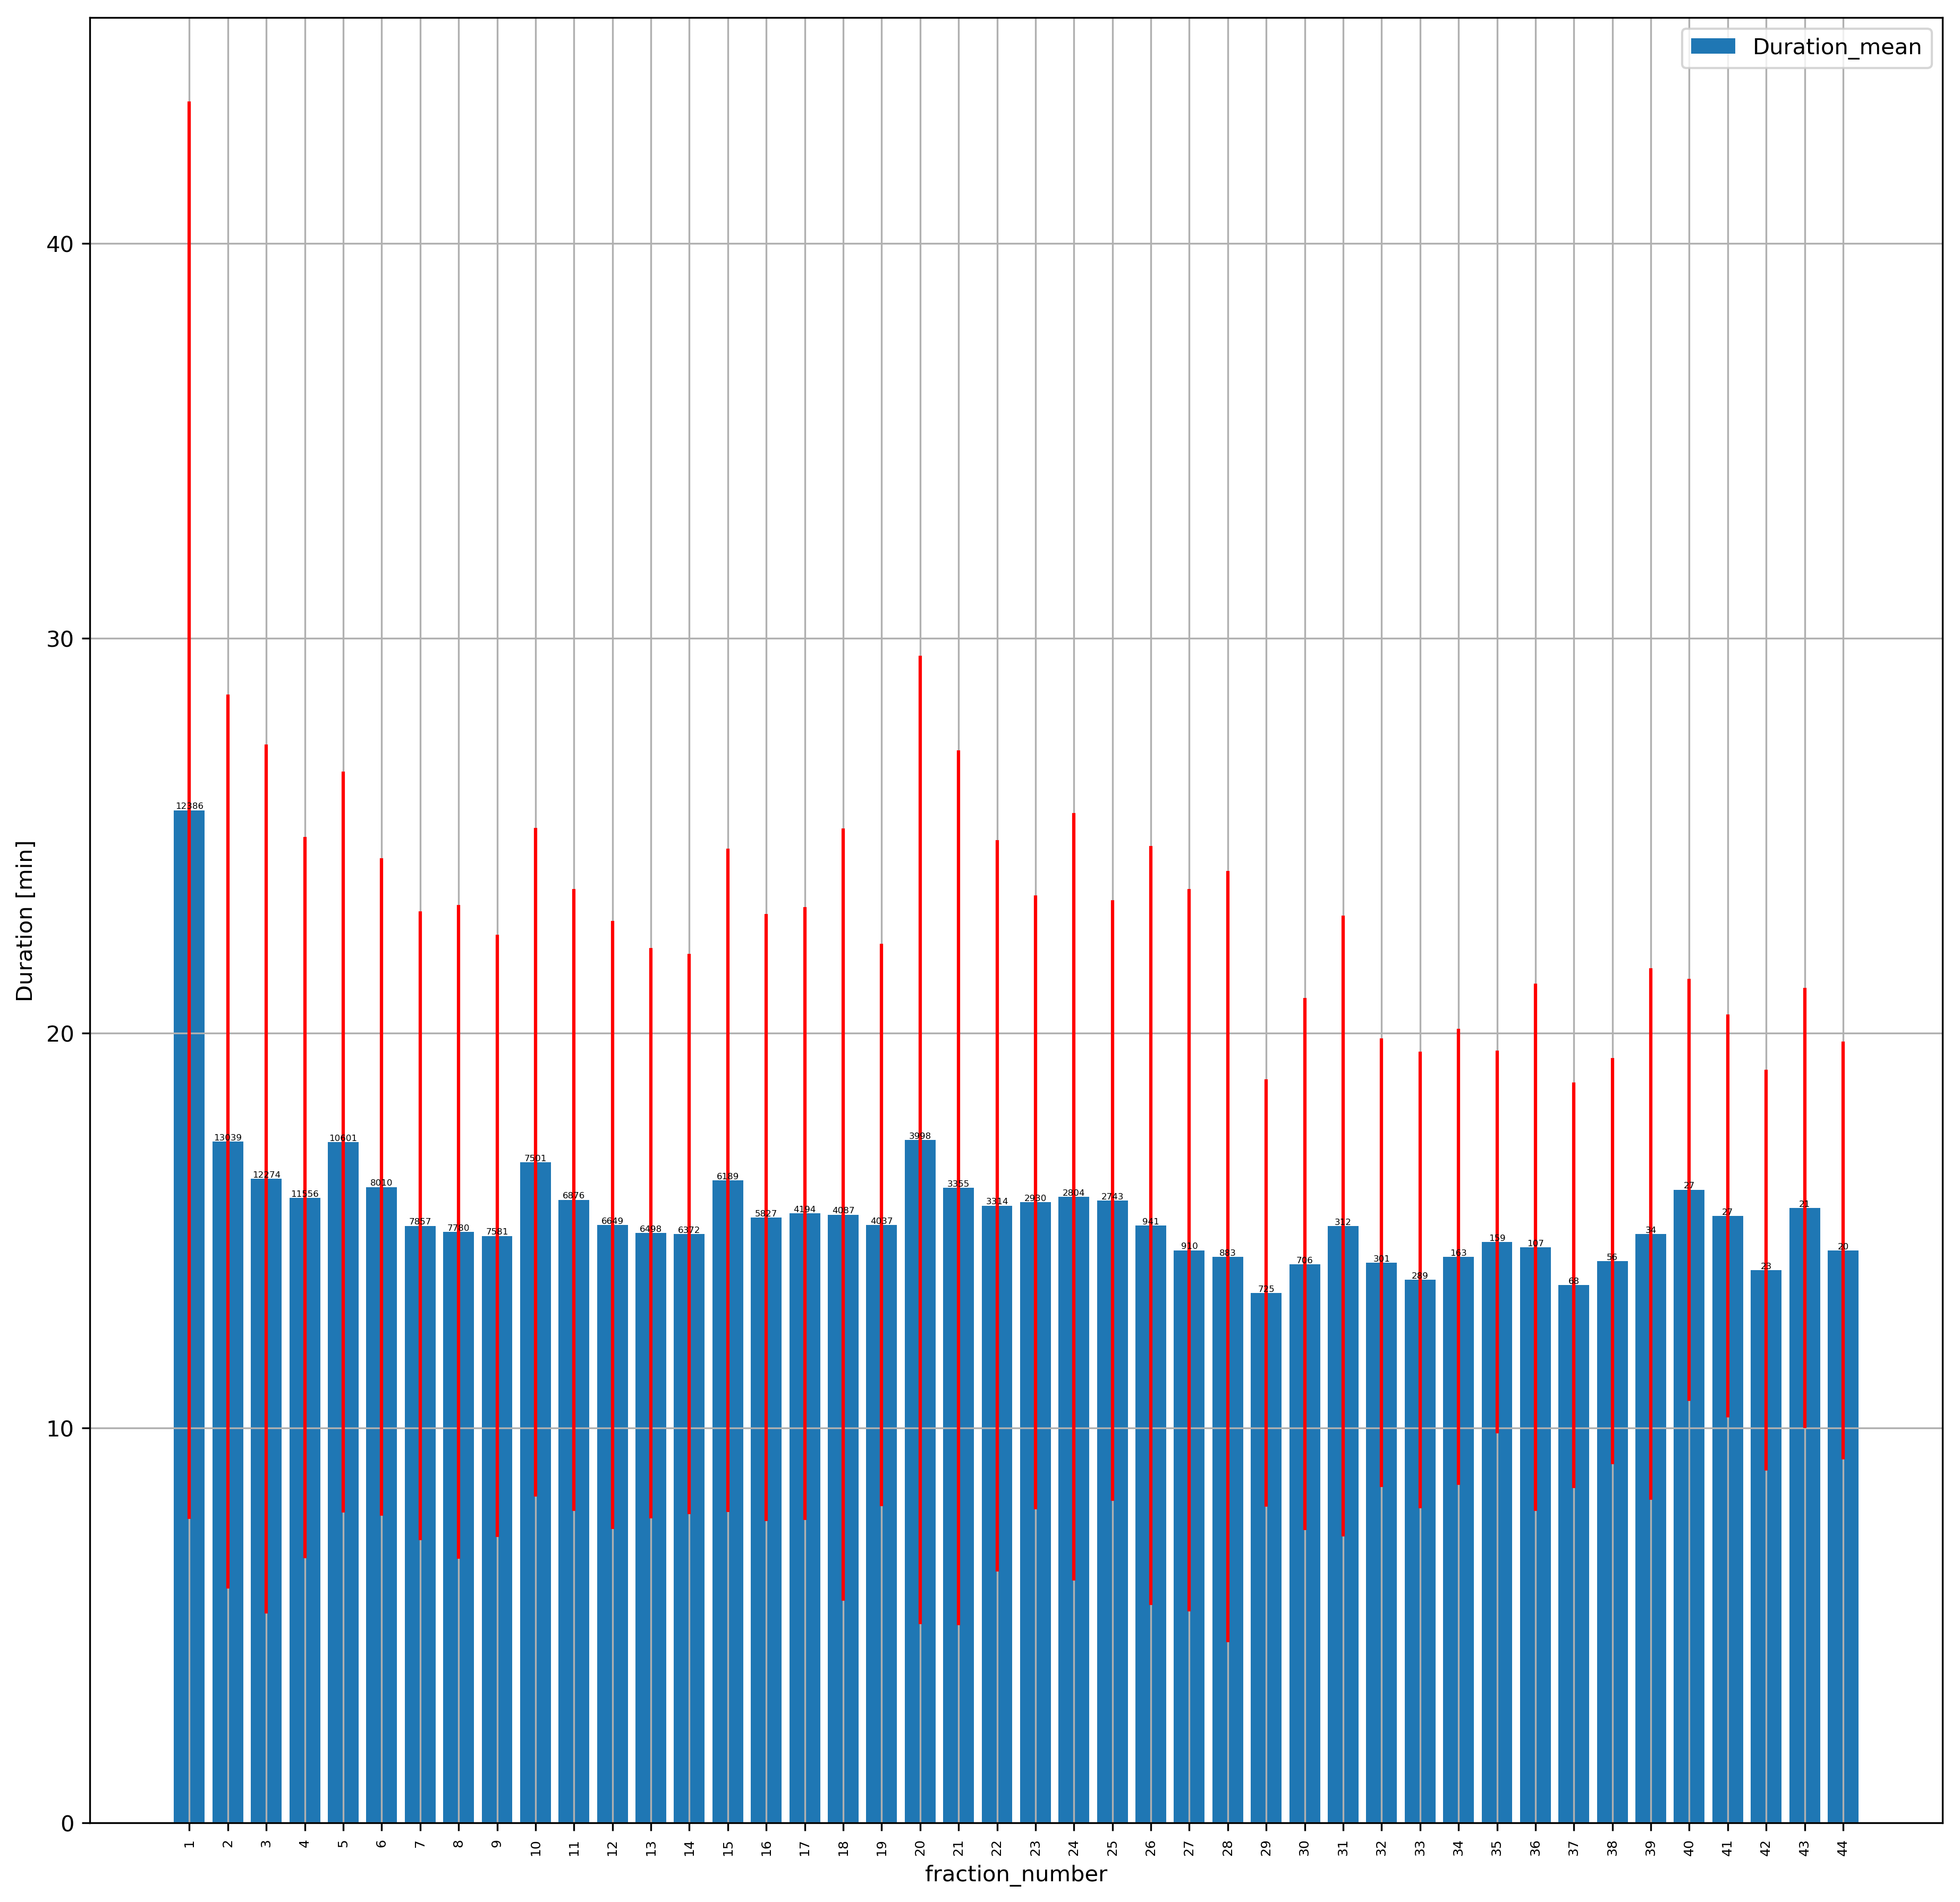

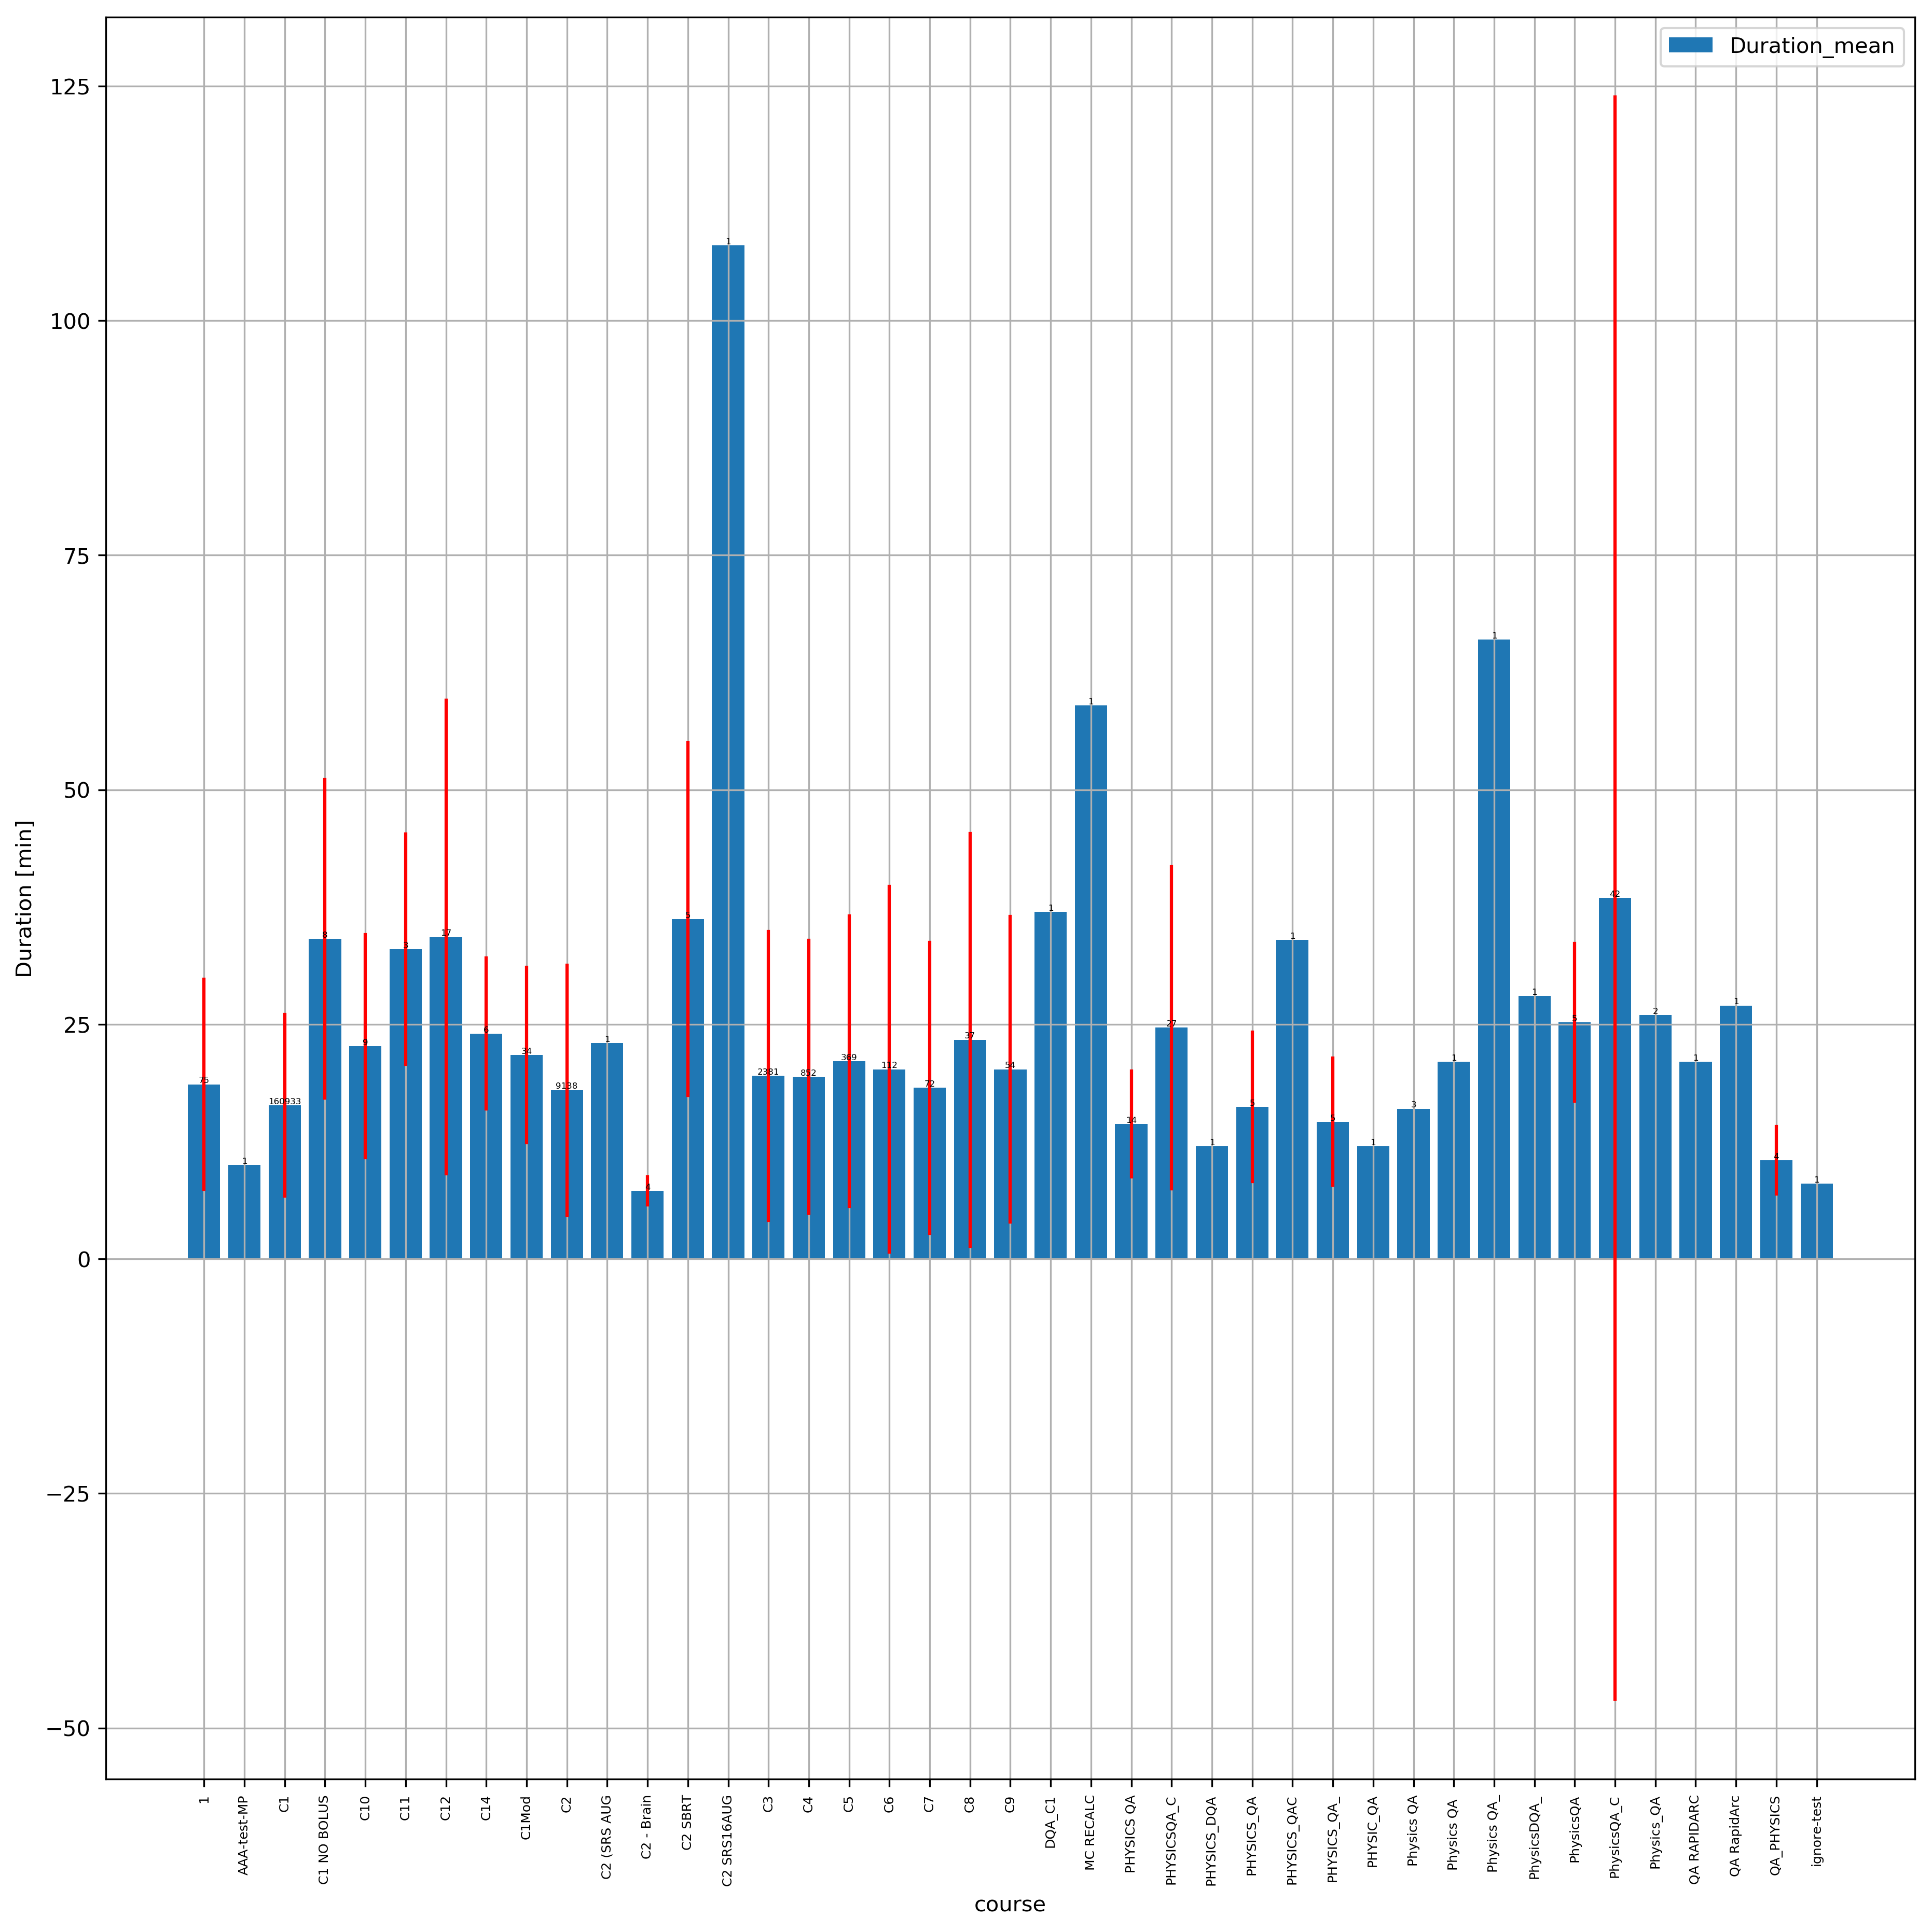





 age


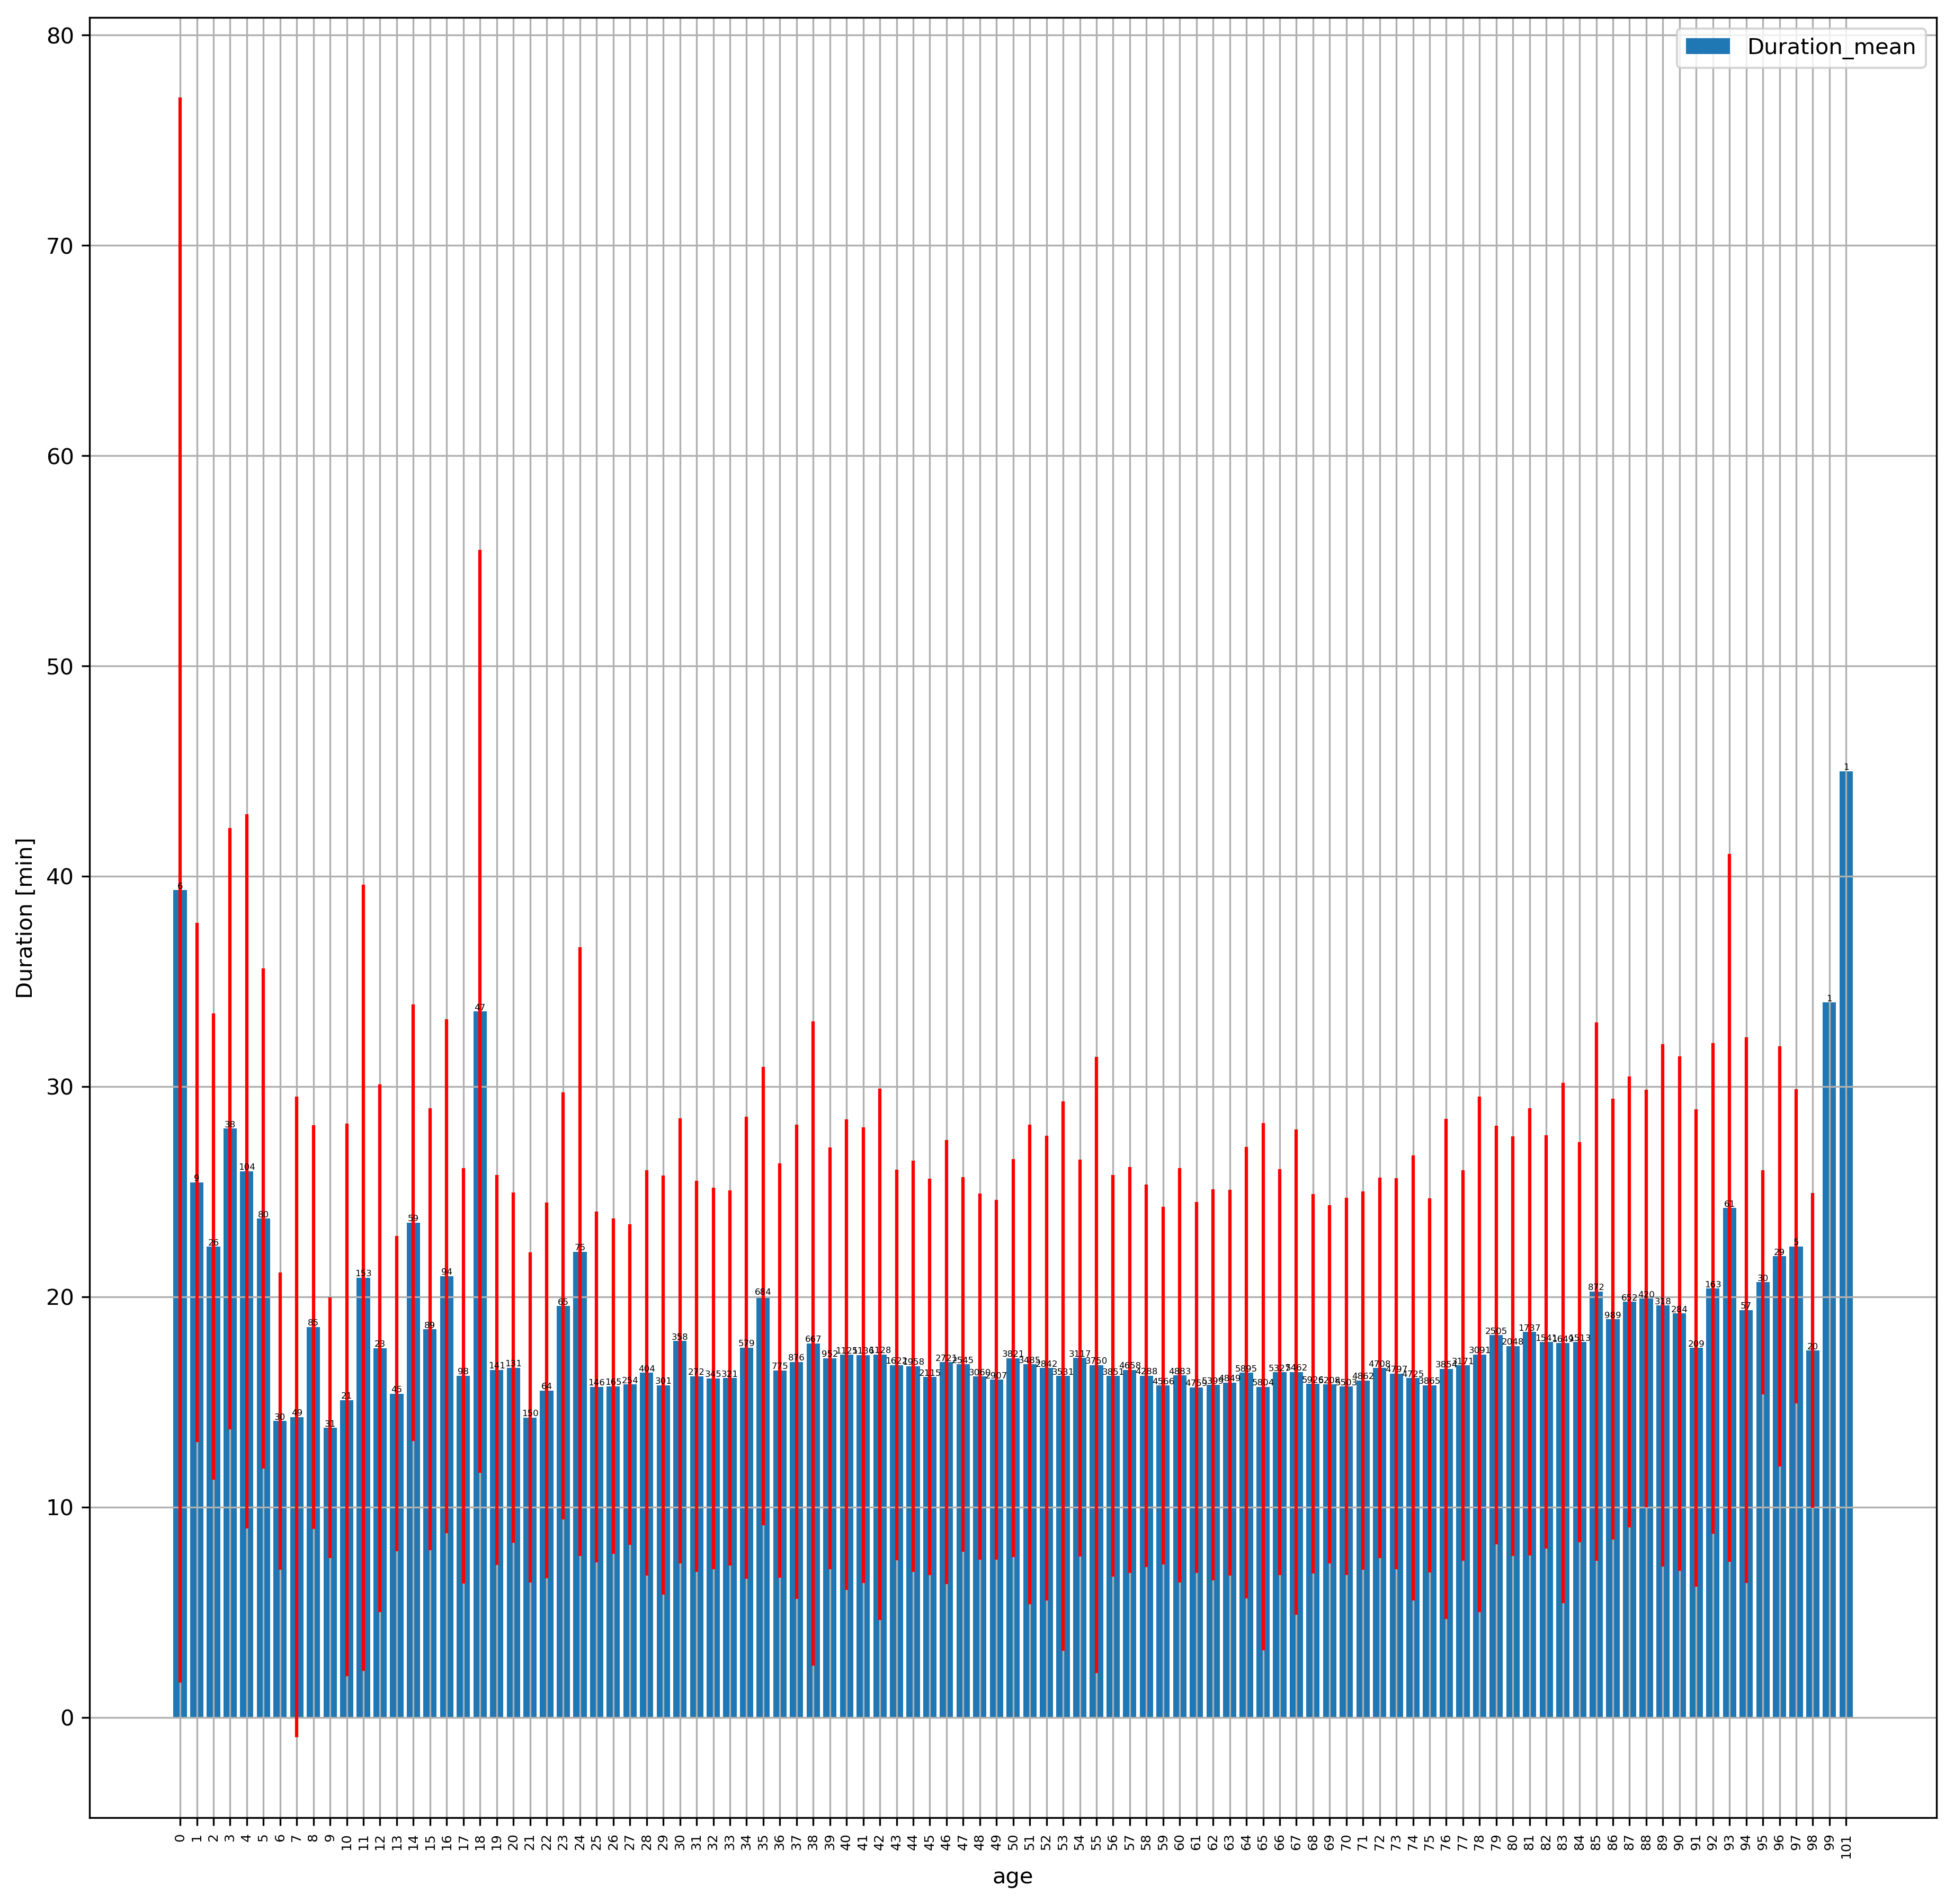

age has finished!




 appt_day_of_week


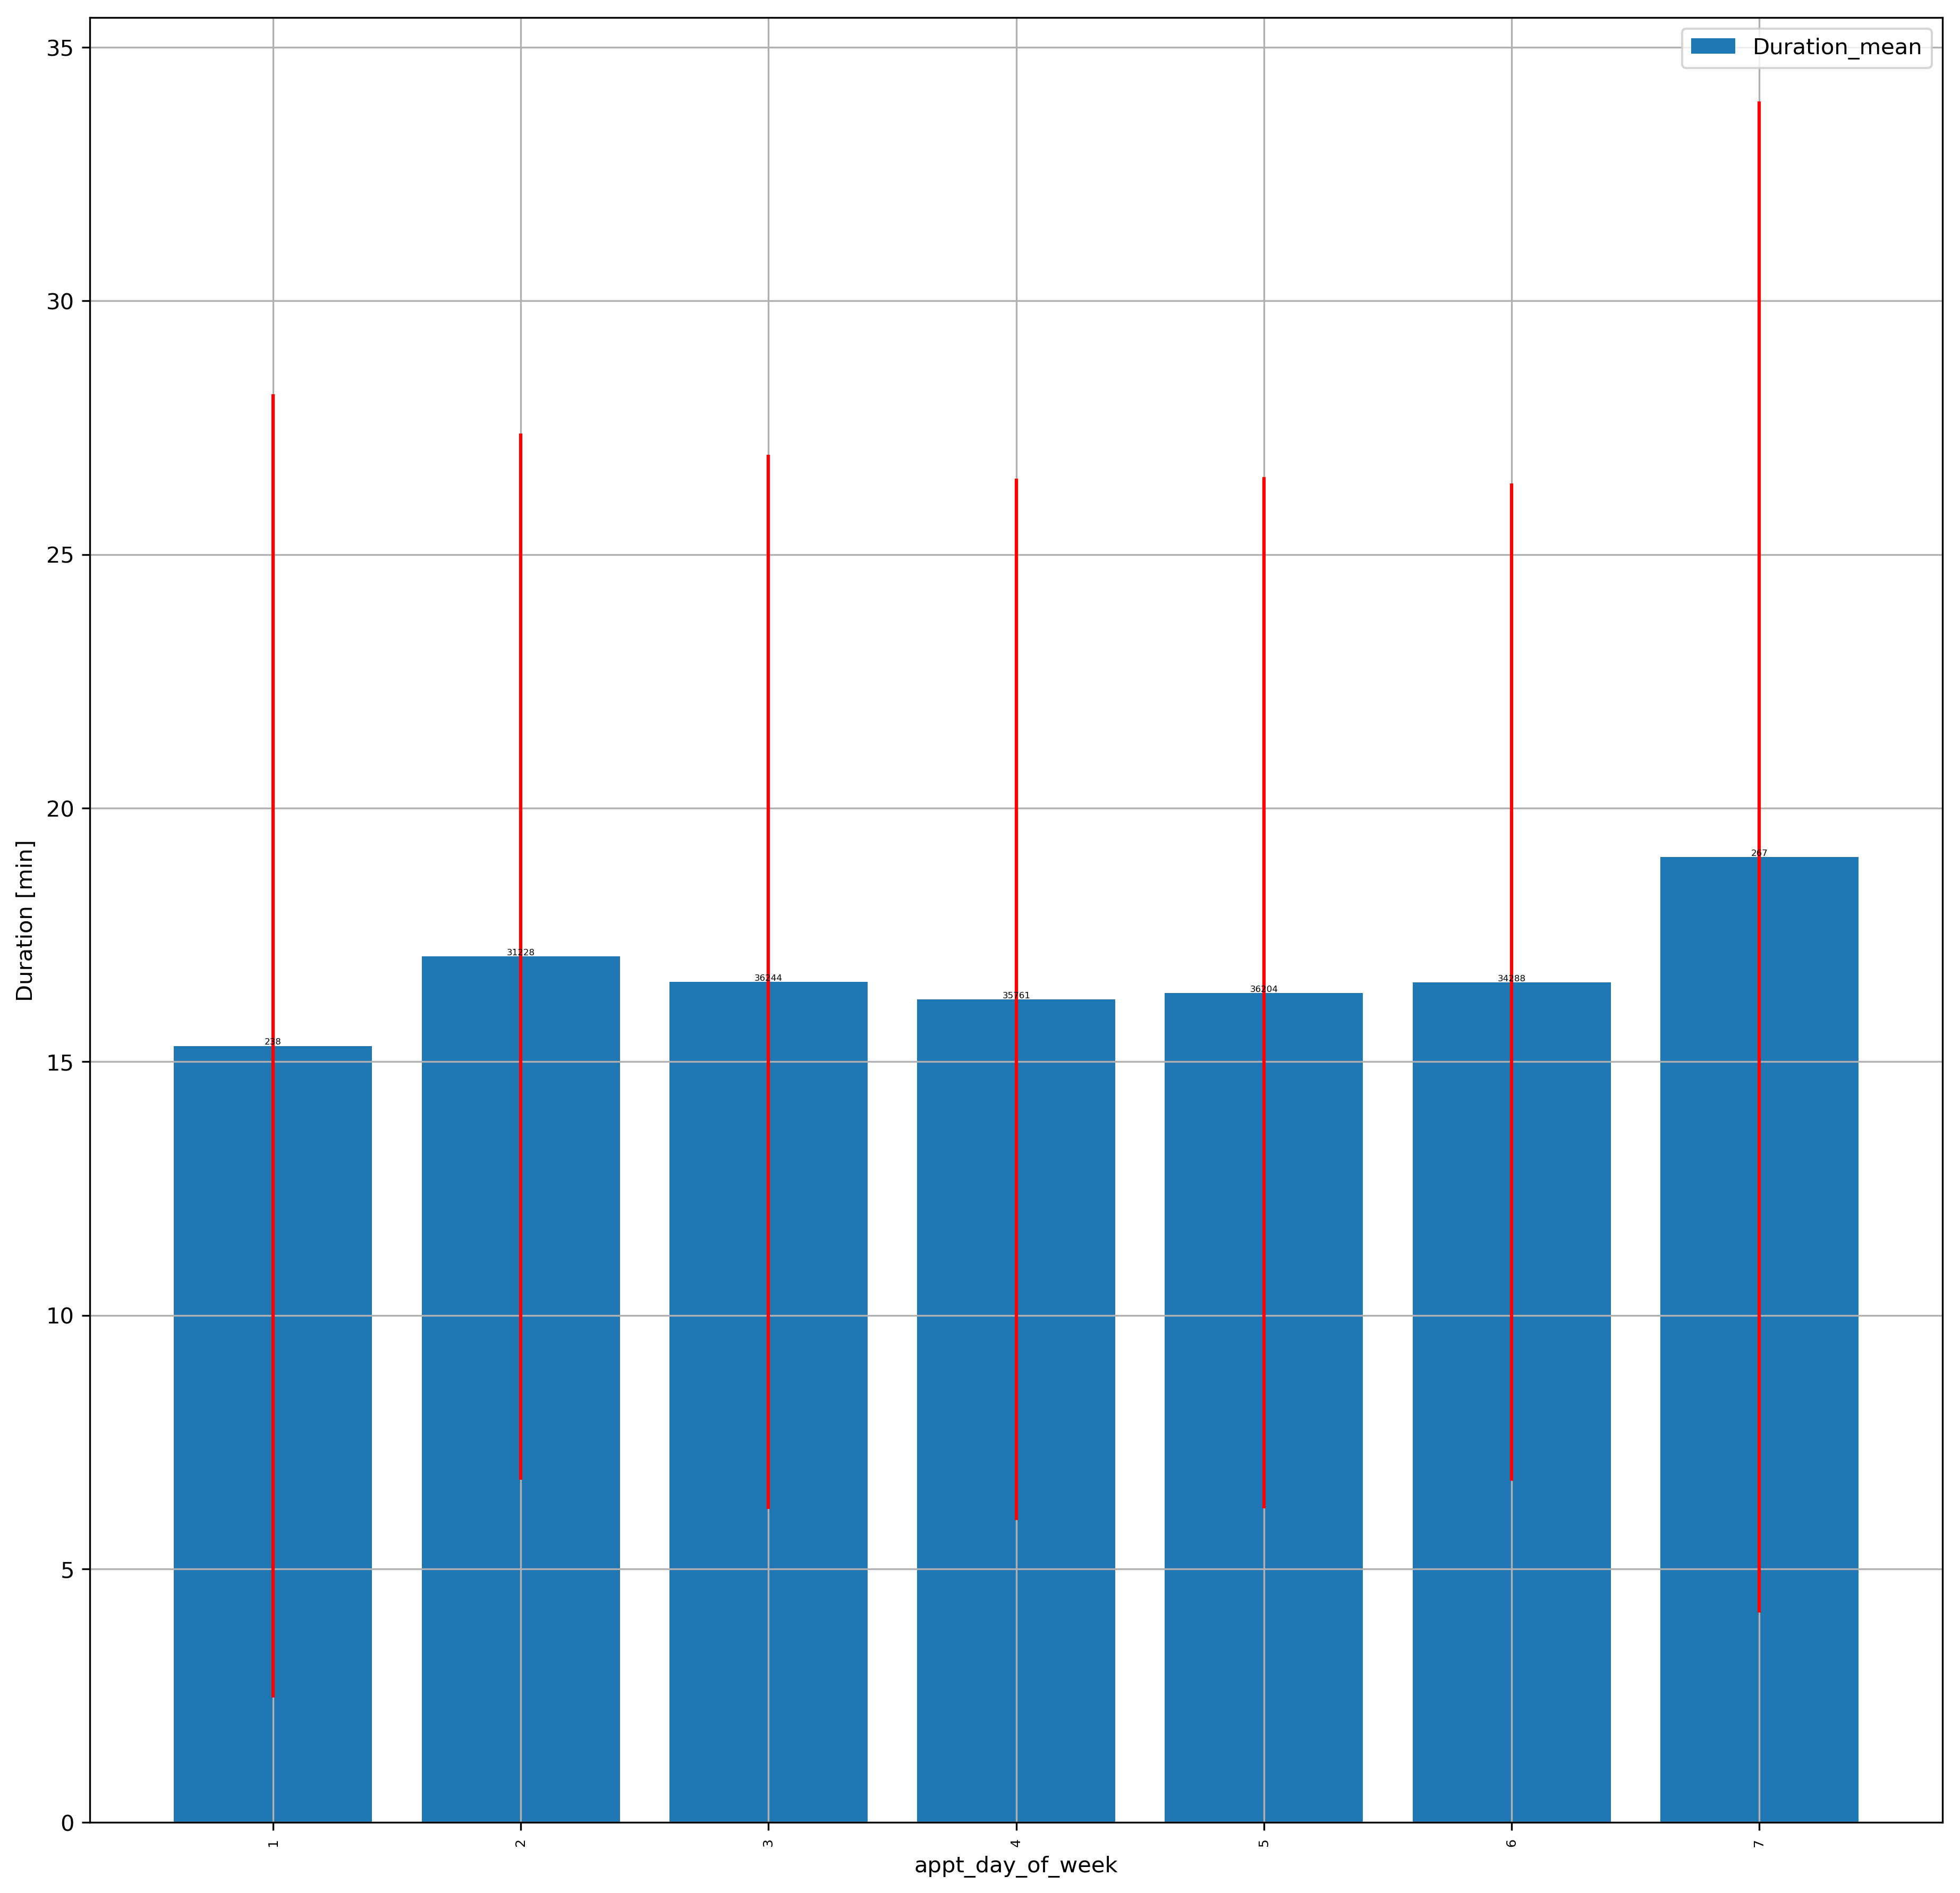

appt_day_of_week has finished!




 appt_hour


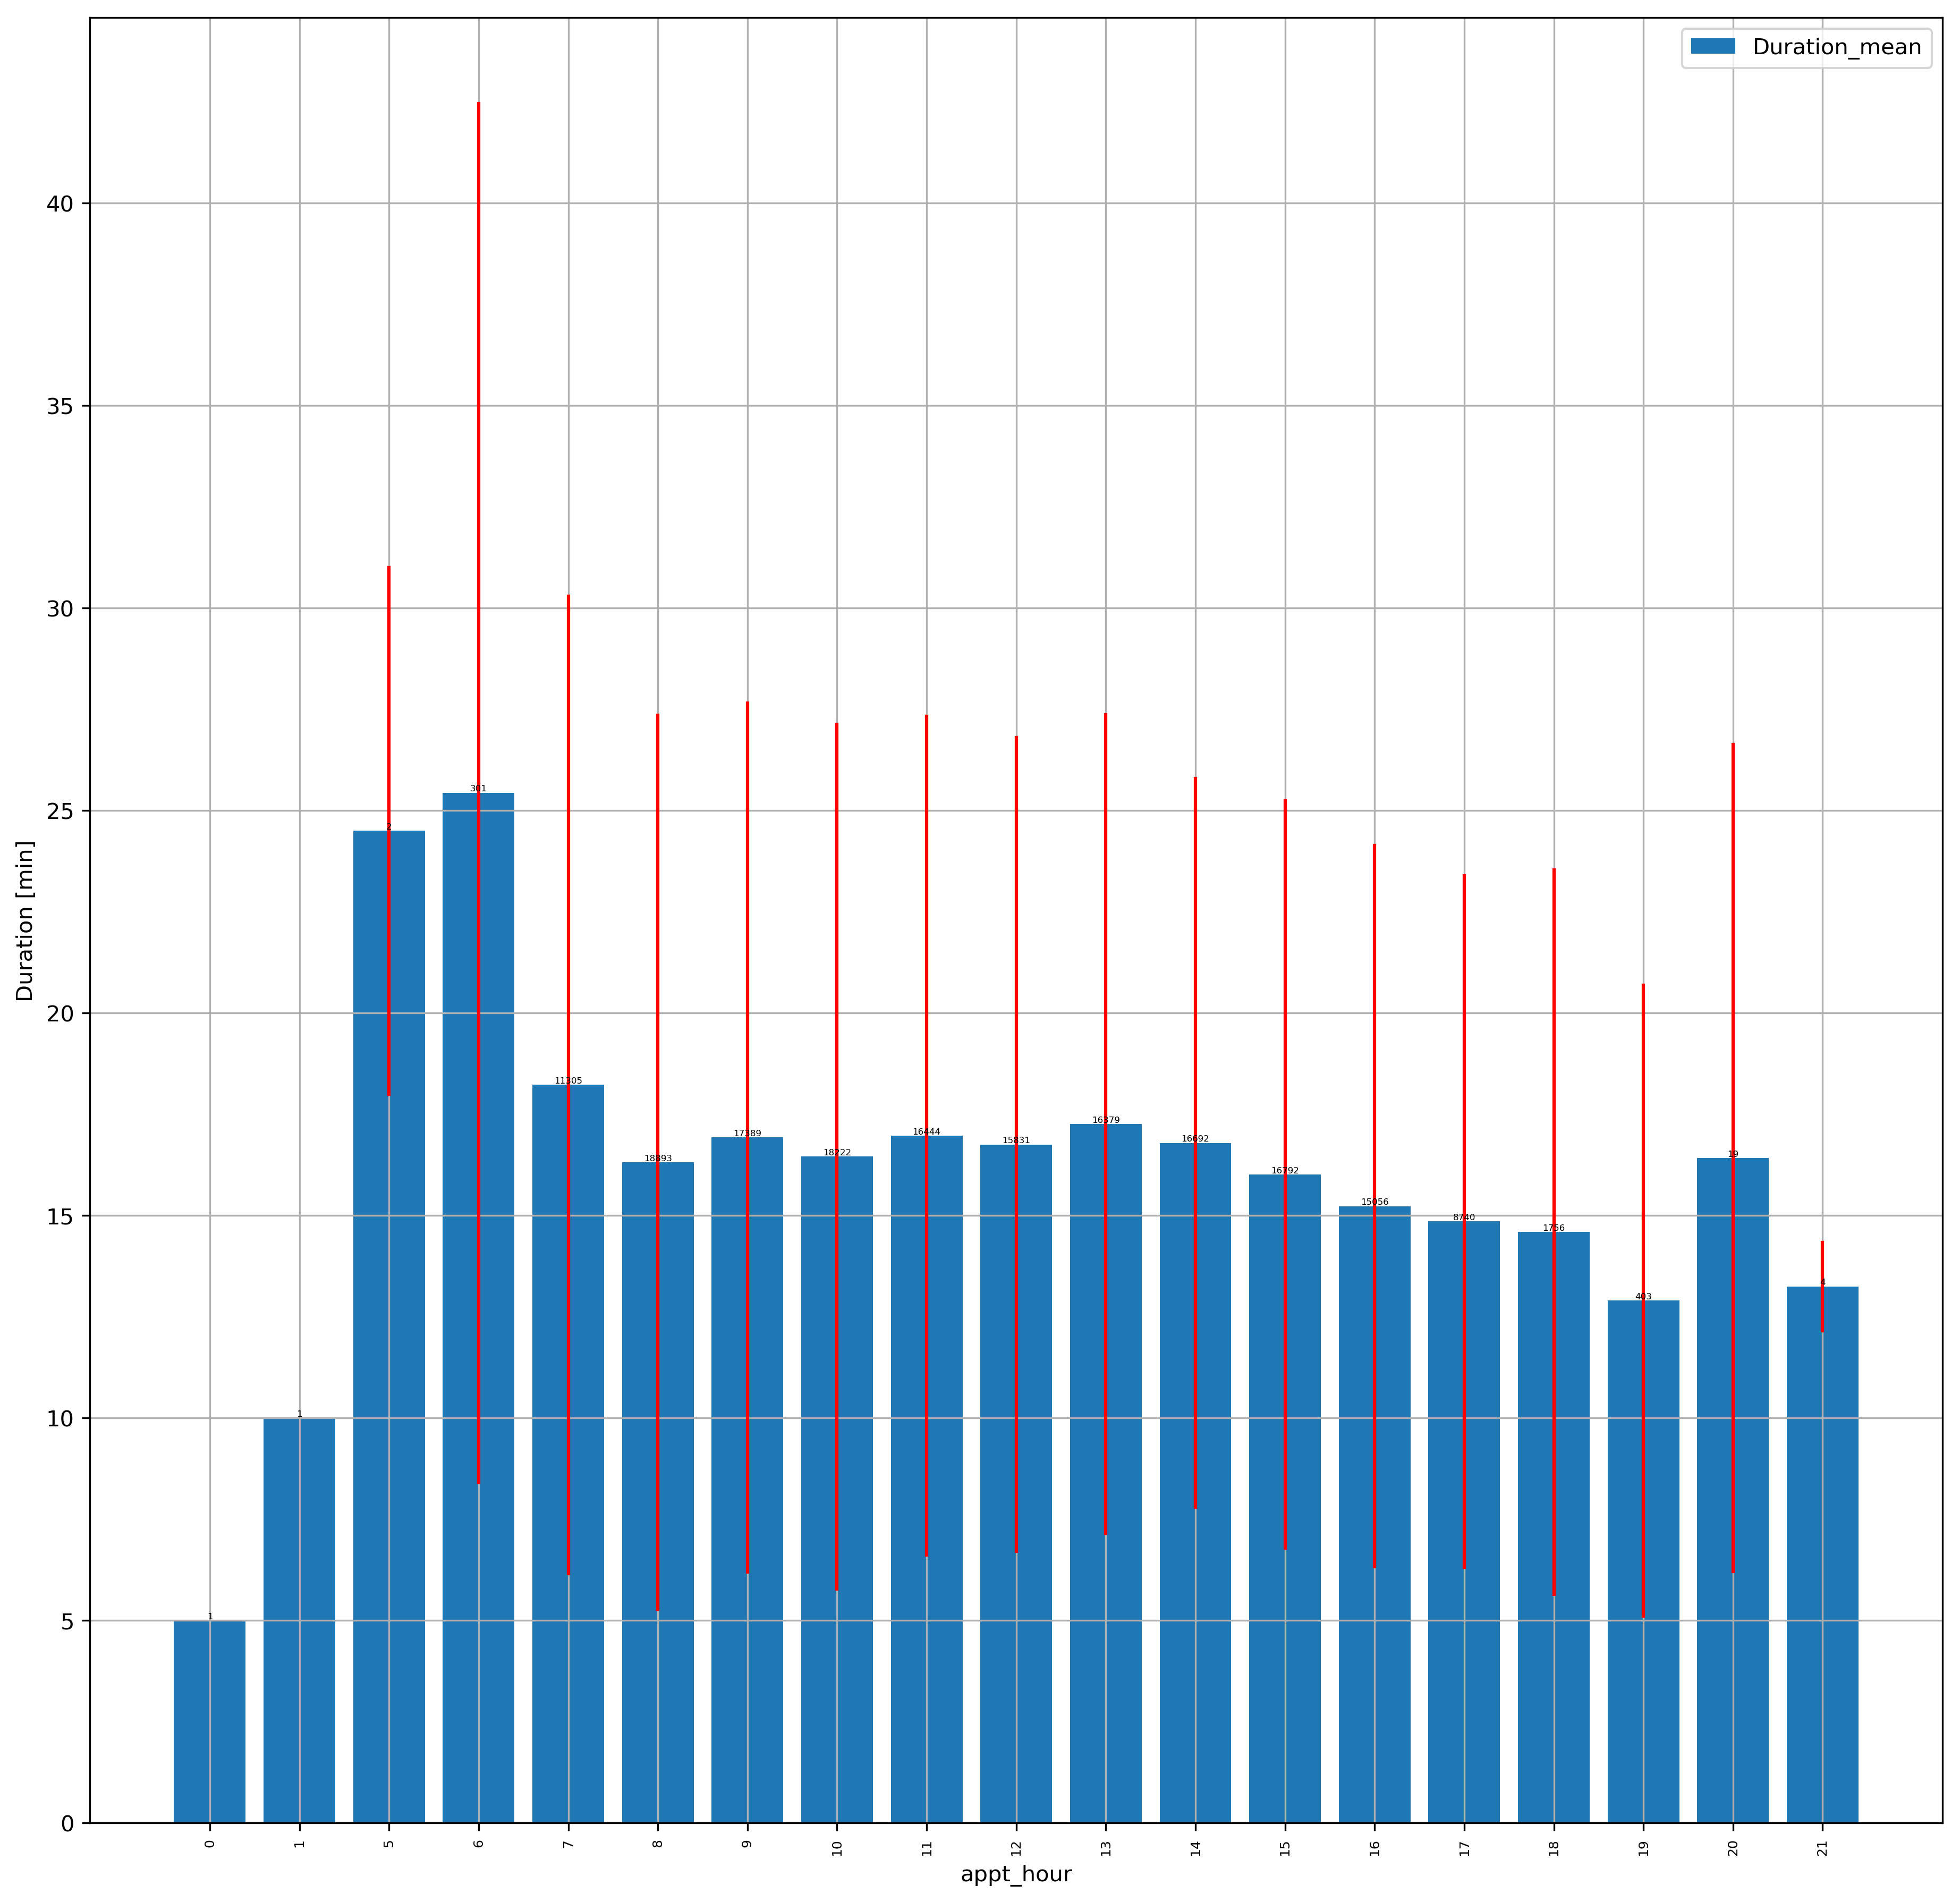

appt_hour has finished!




 appt_month


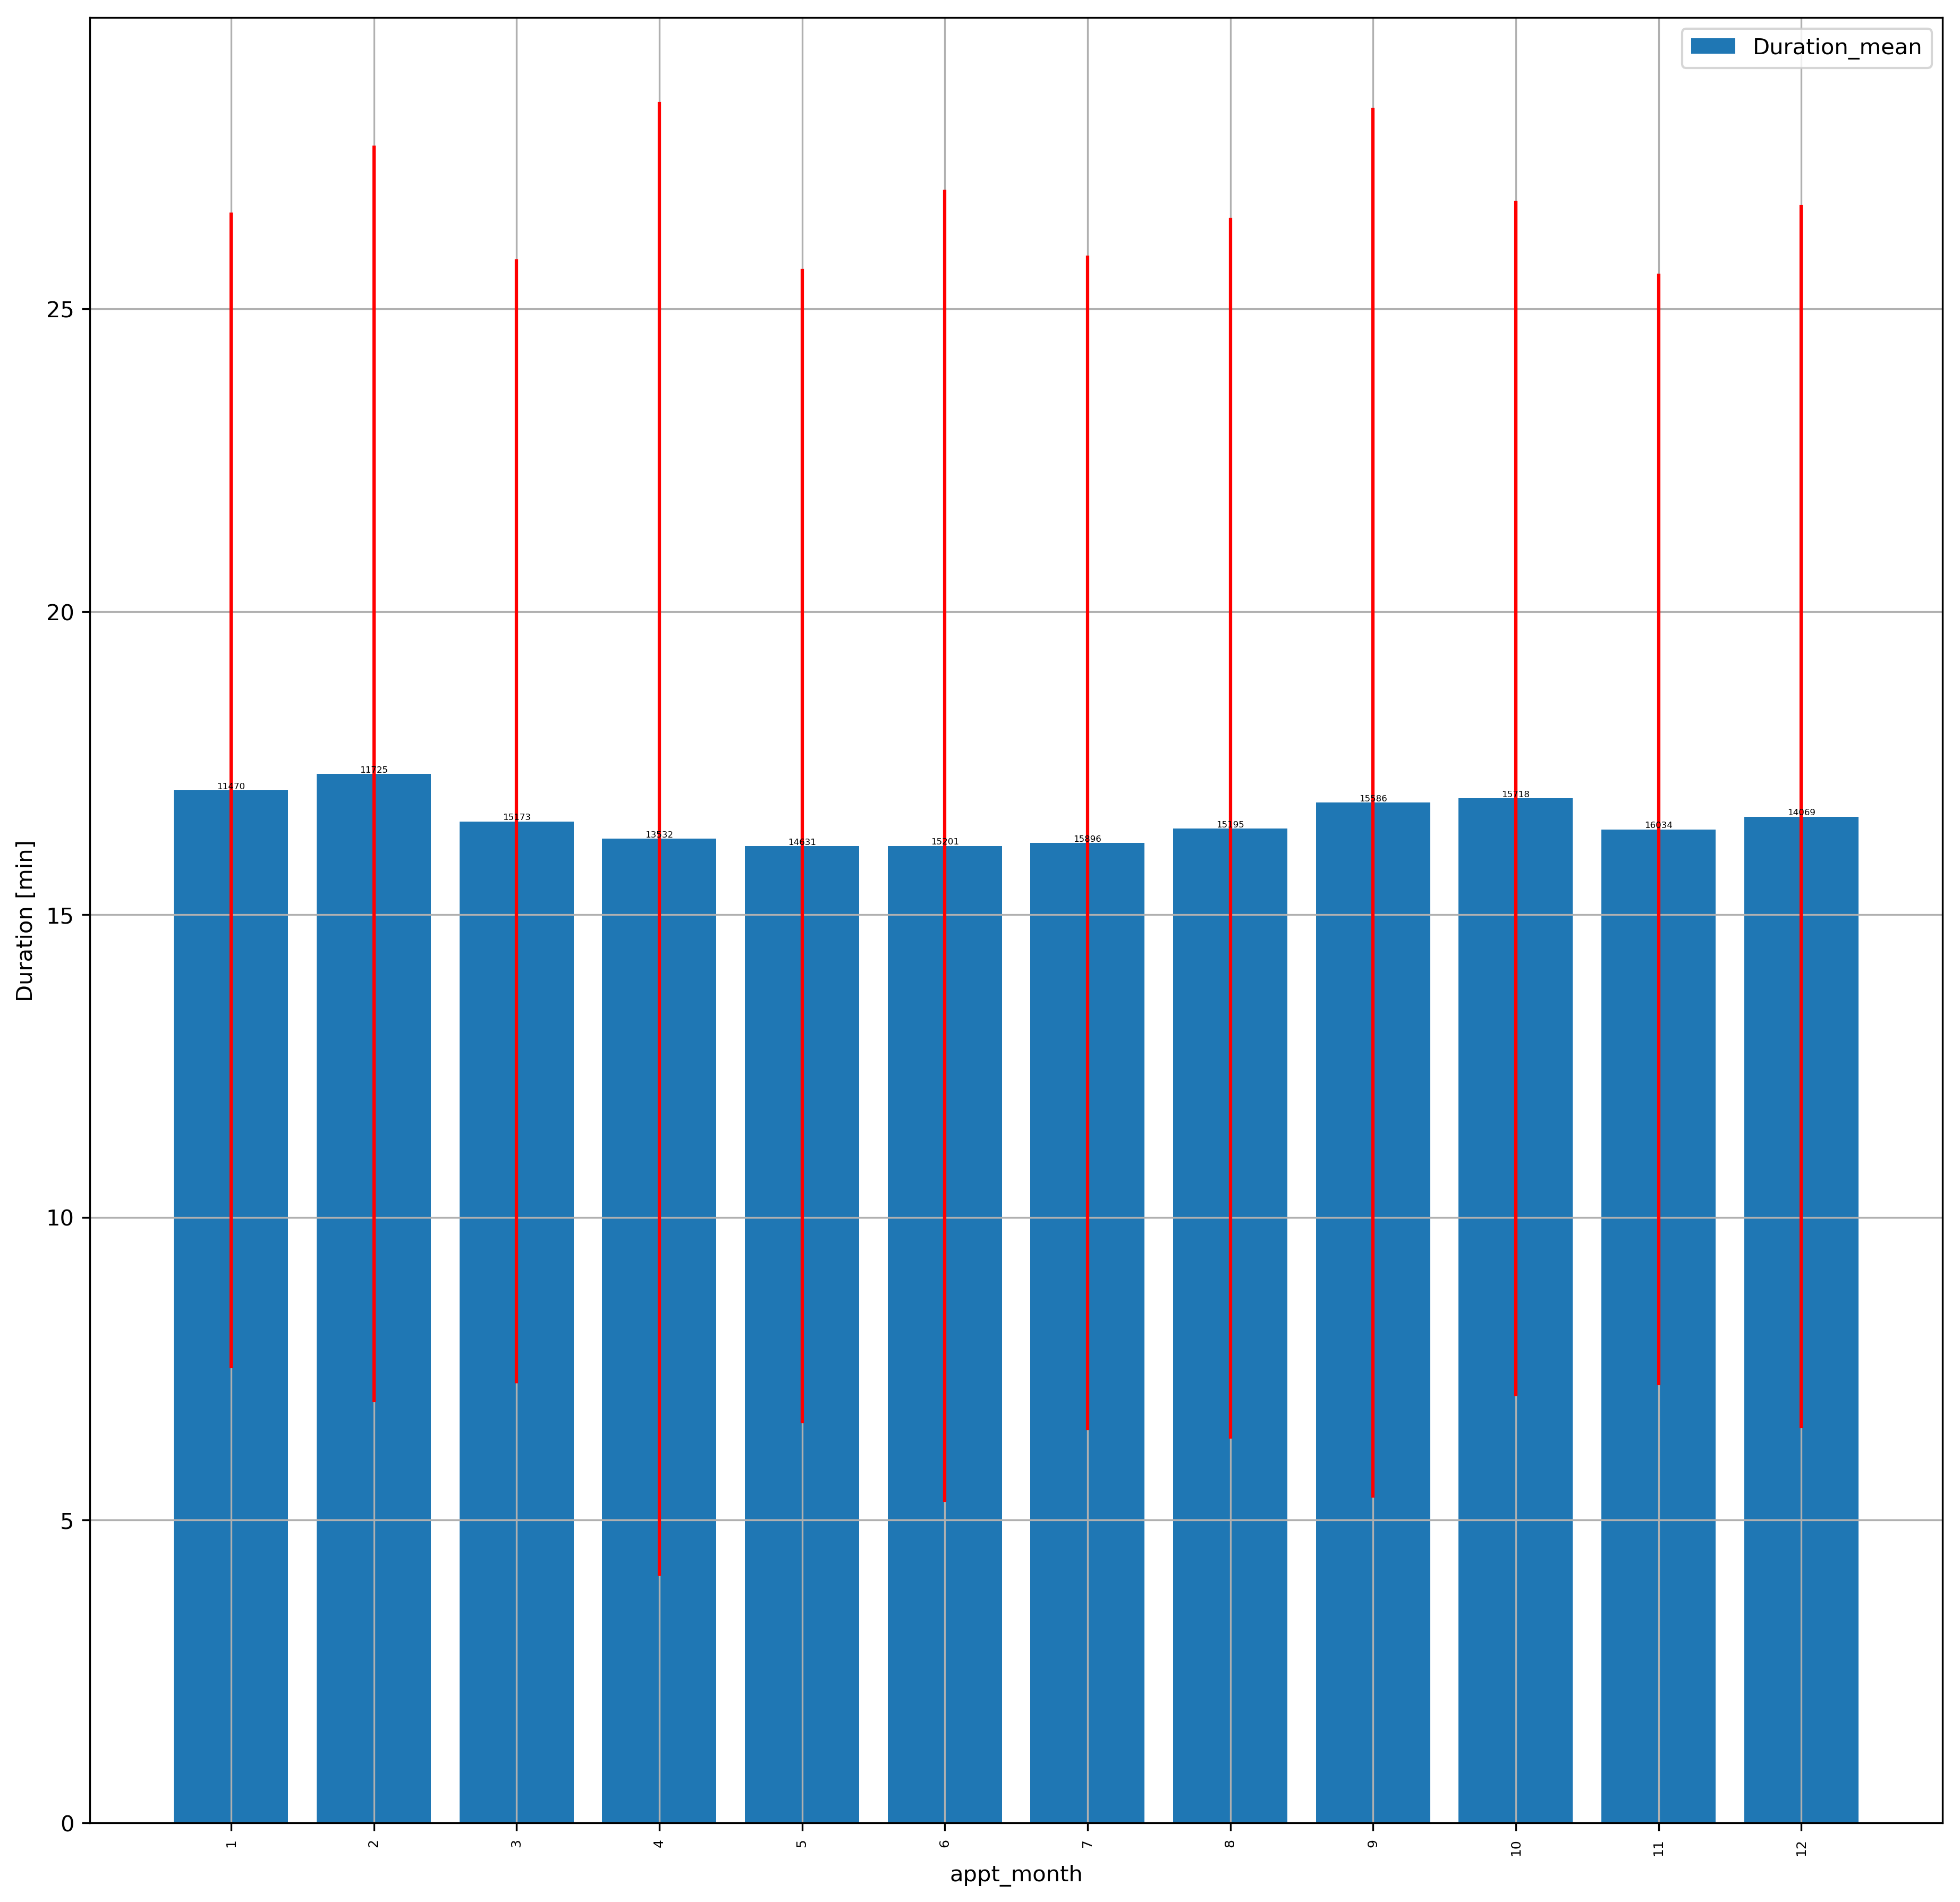

appt_month has finished!




 diagnosis
diagnosis has more than 200 different samples!




 duration


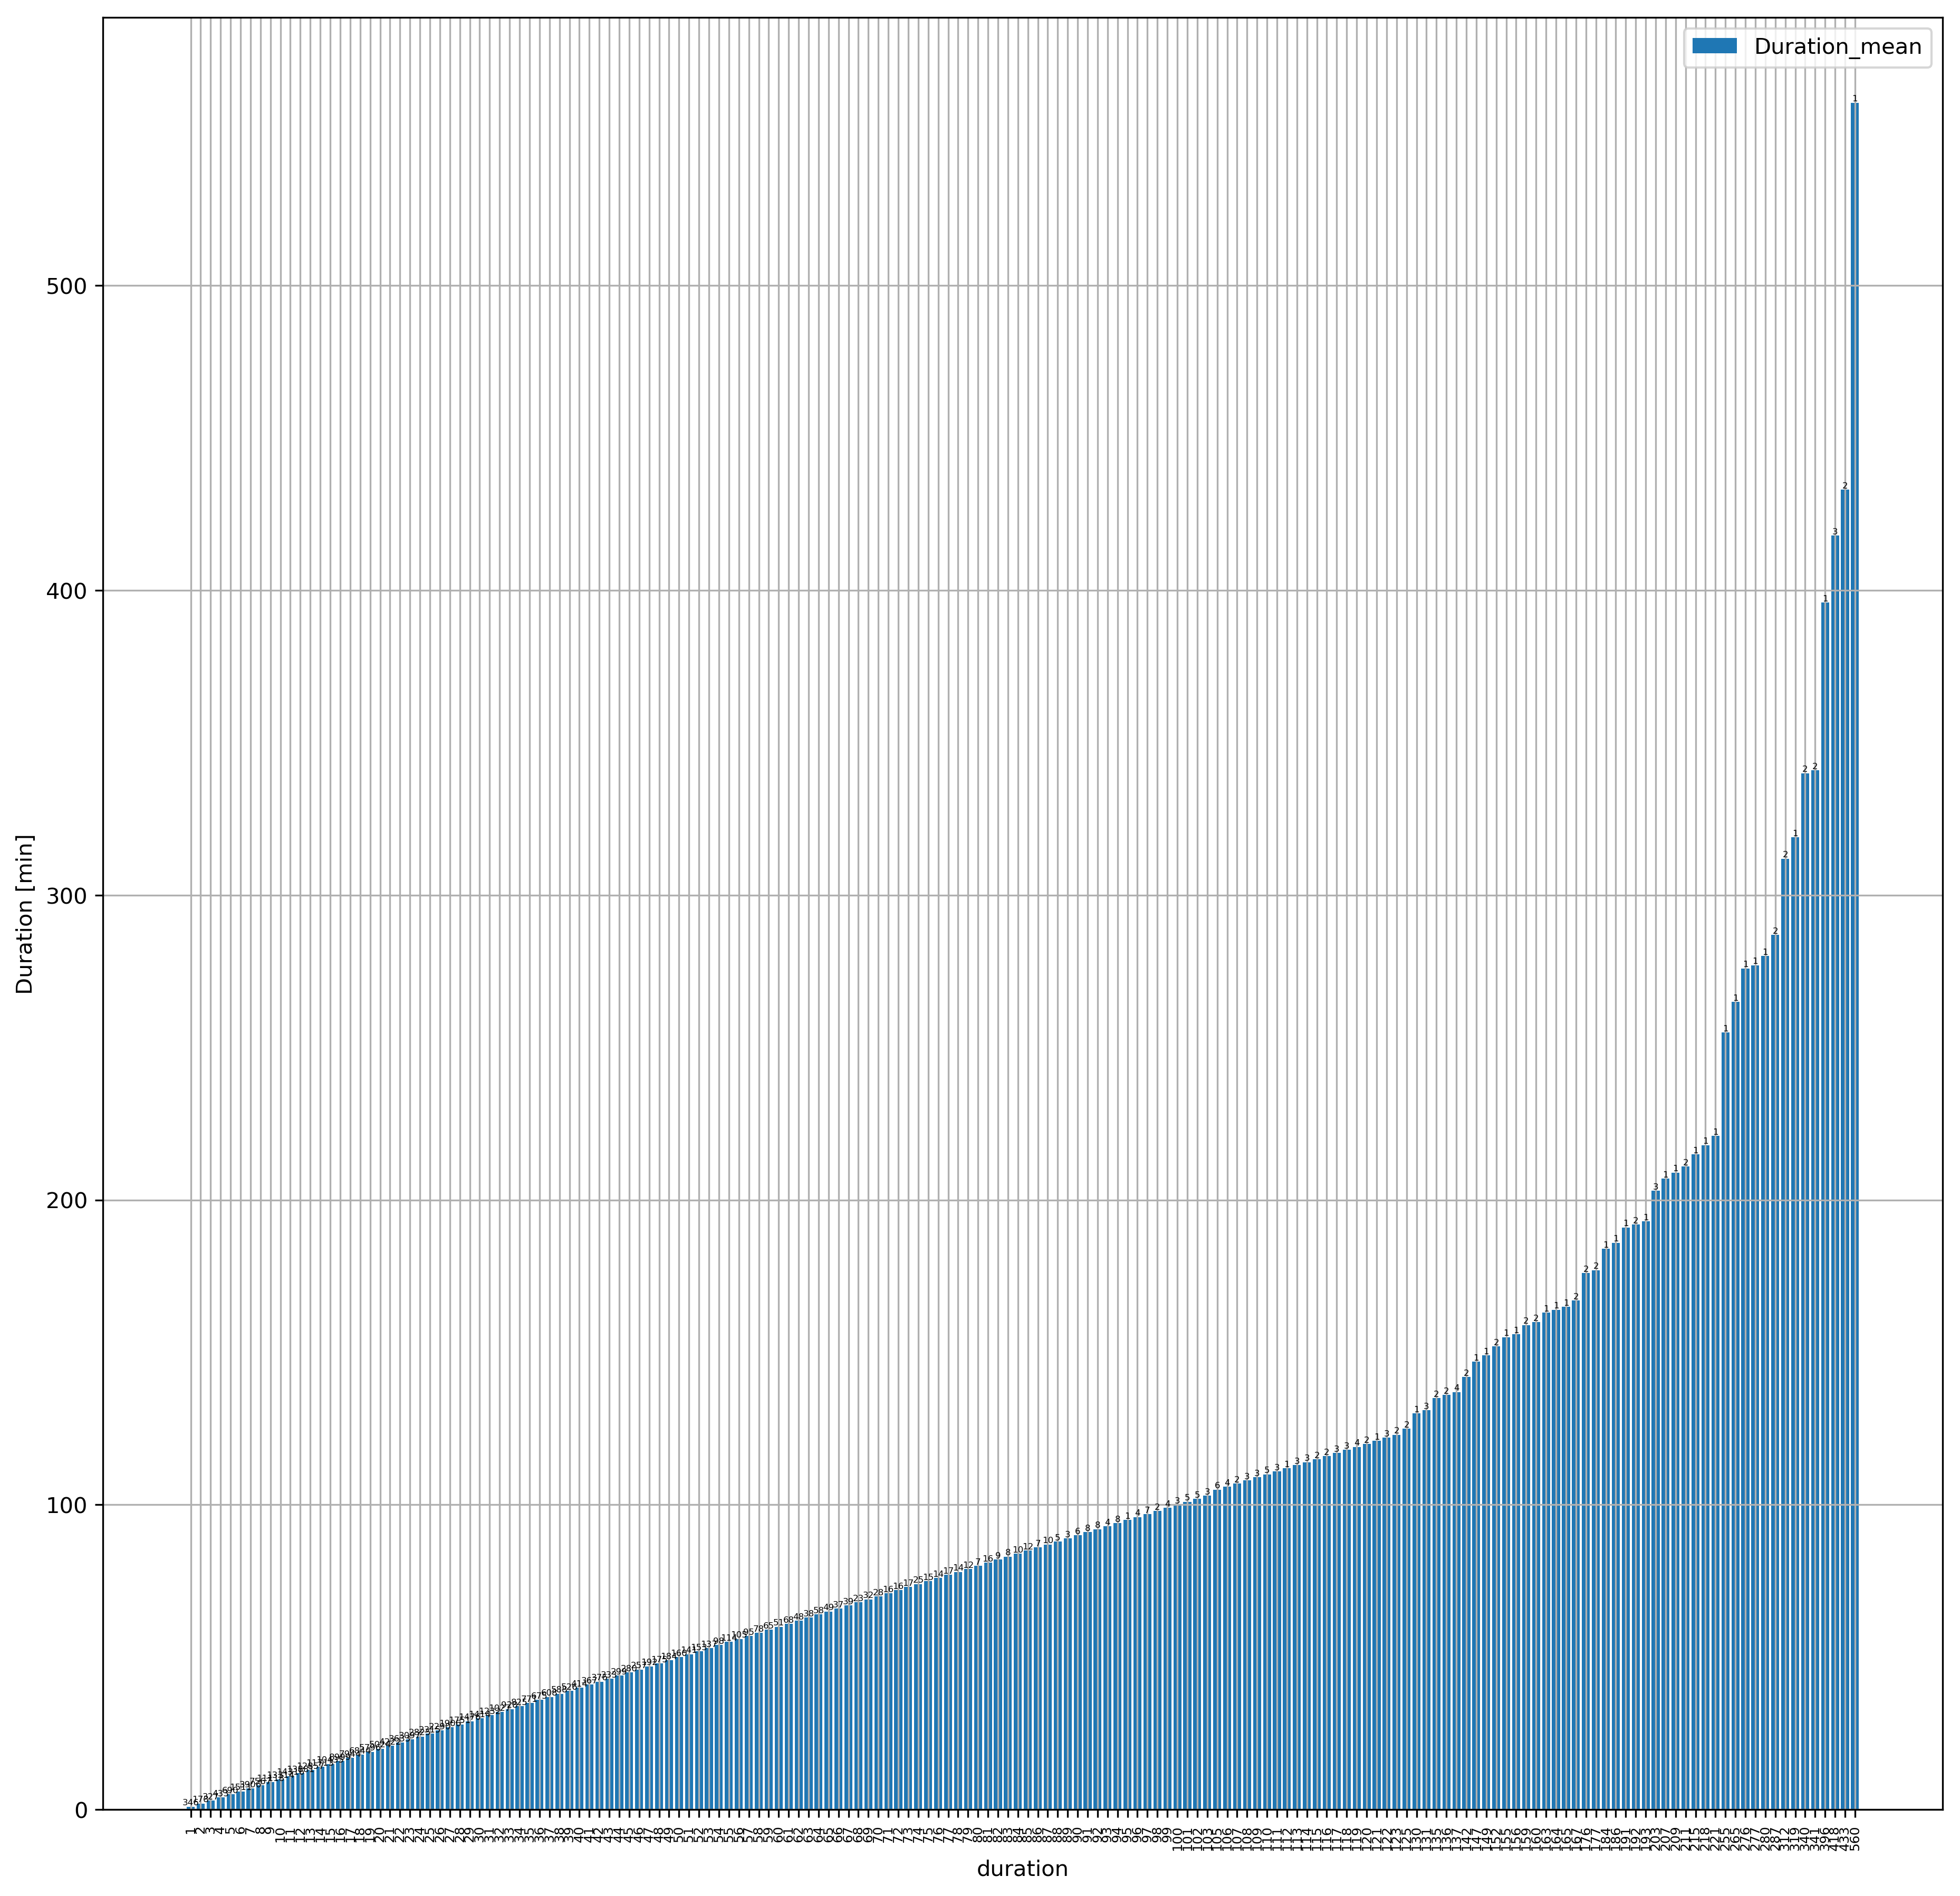

duration has finished!




 gender


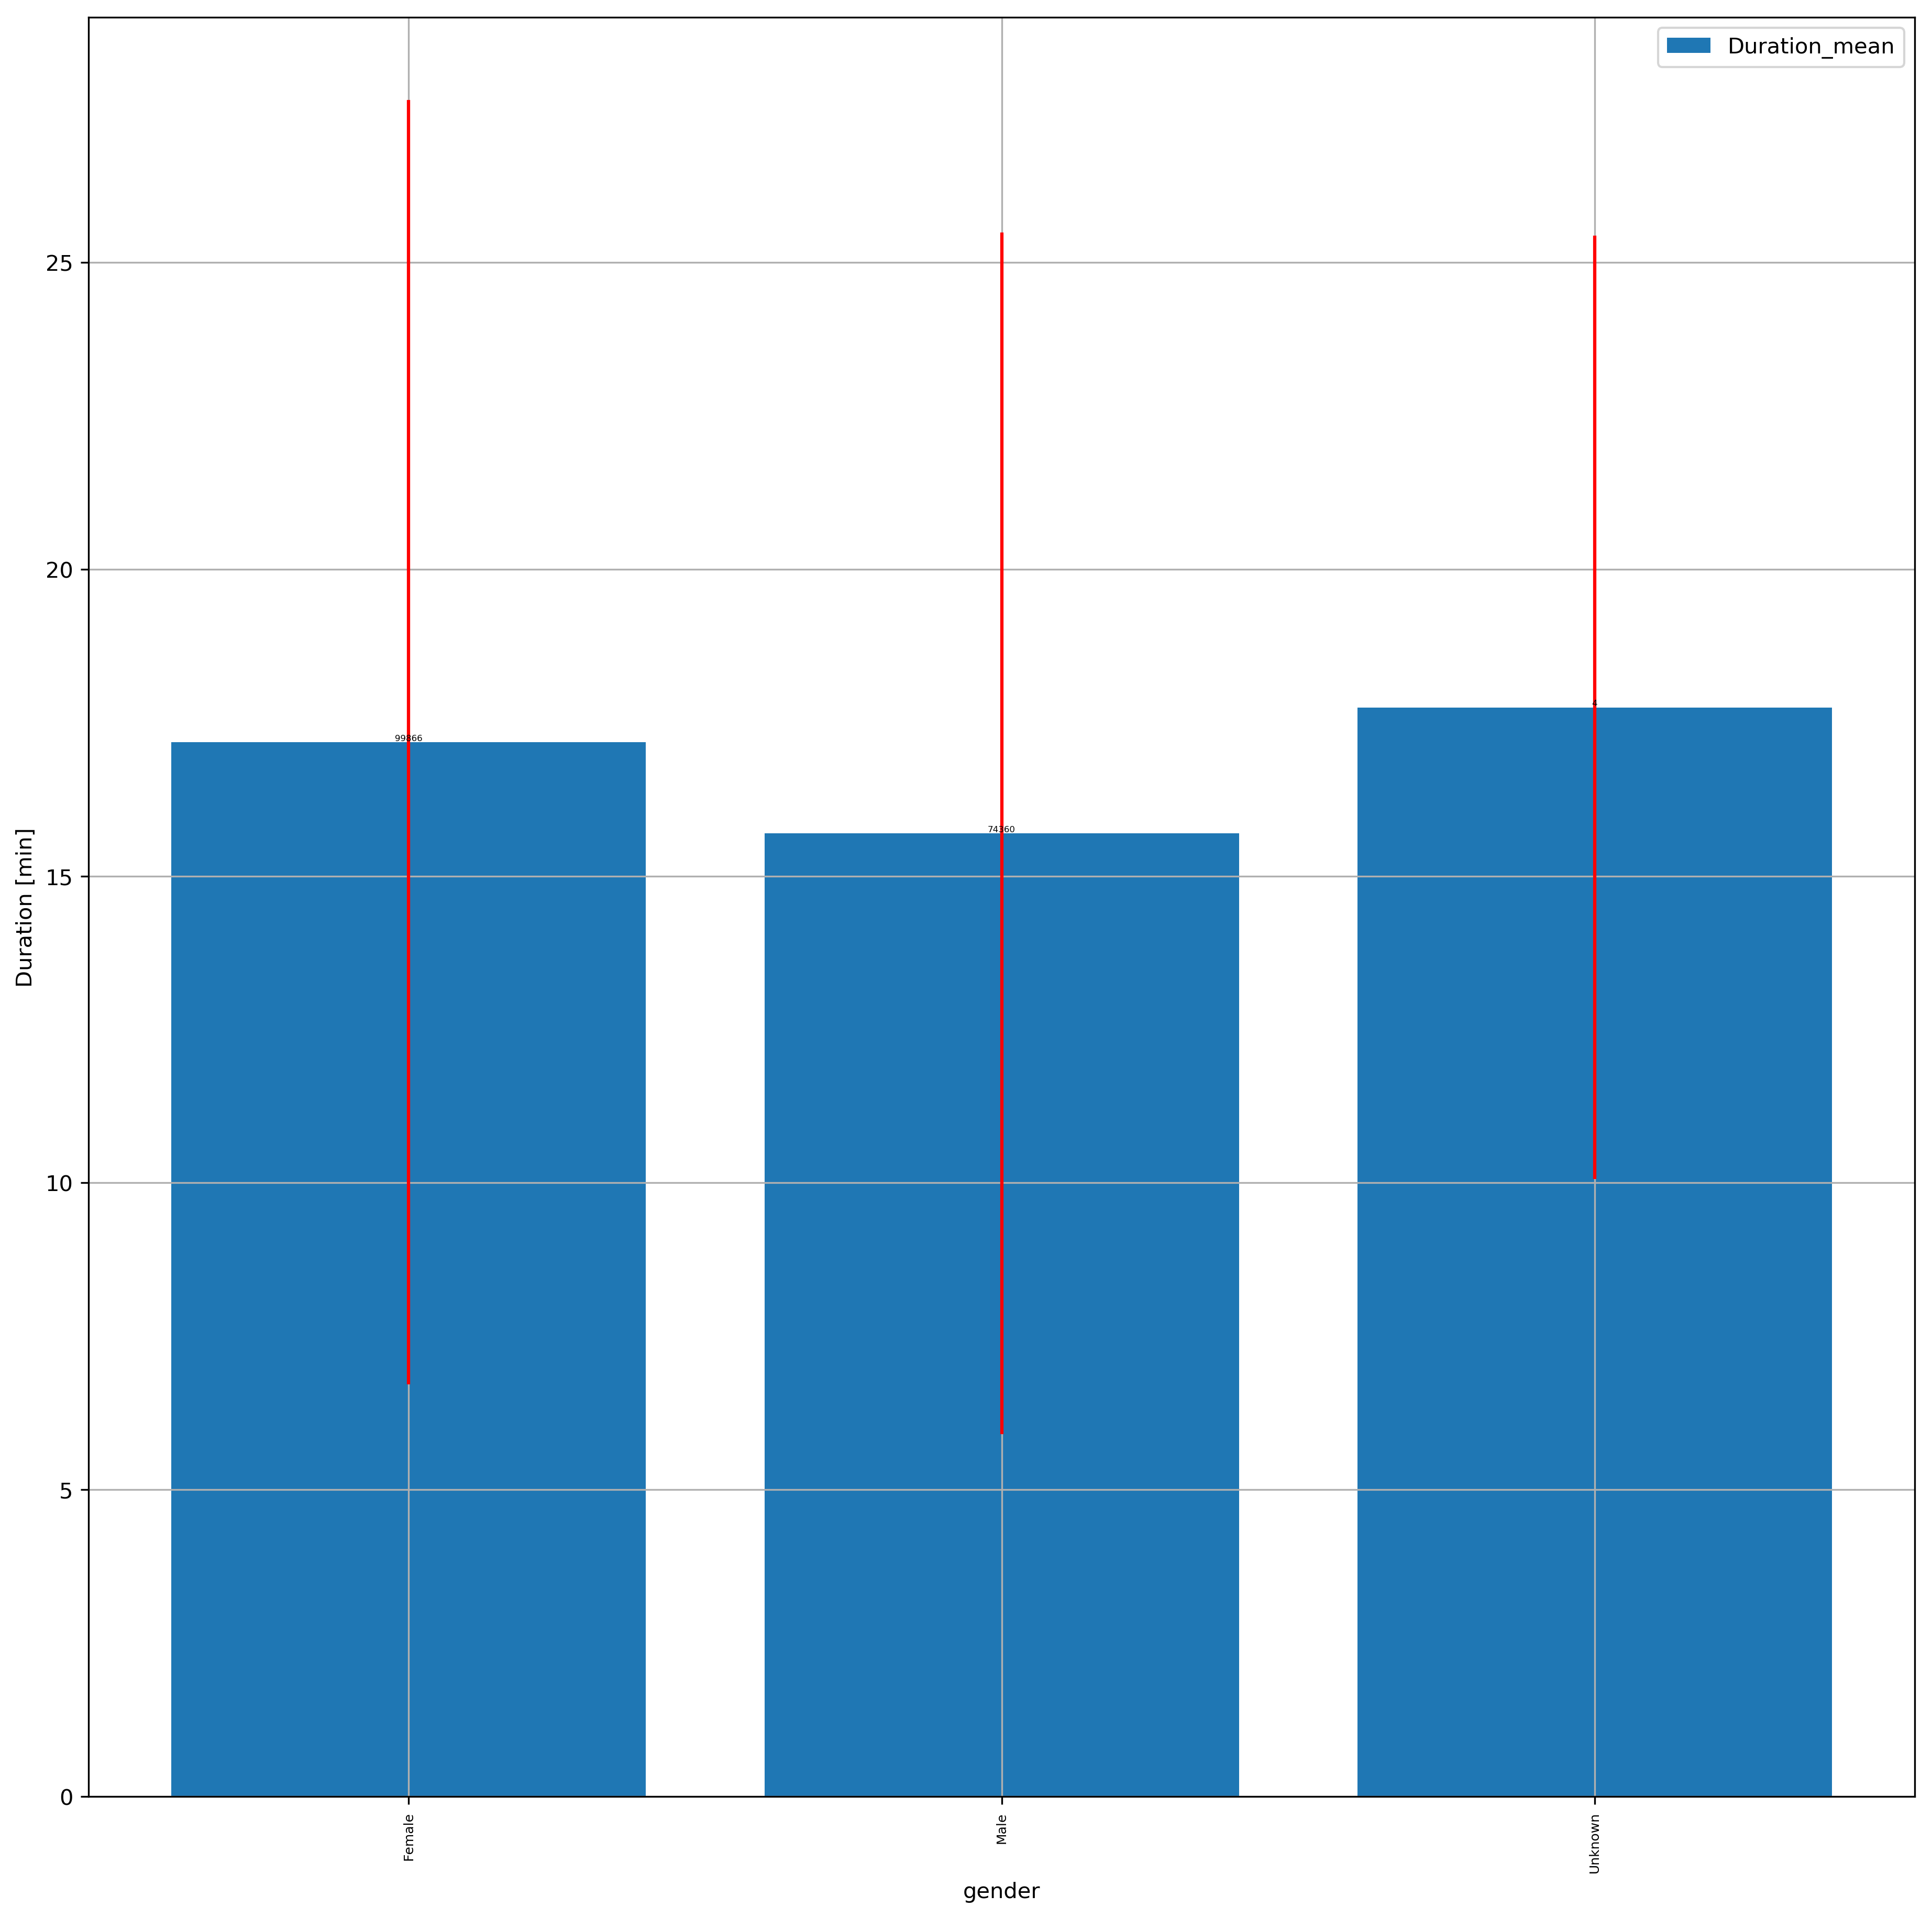

gender has finished!




 image_duration
image_duration has more than 200 different samples!




 images_taken


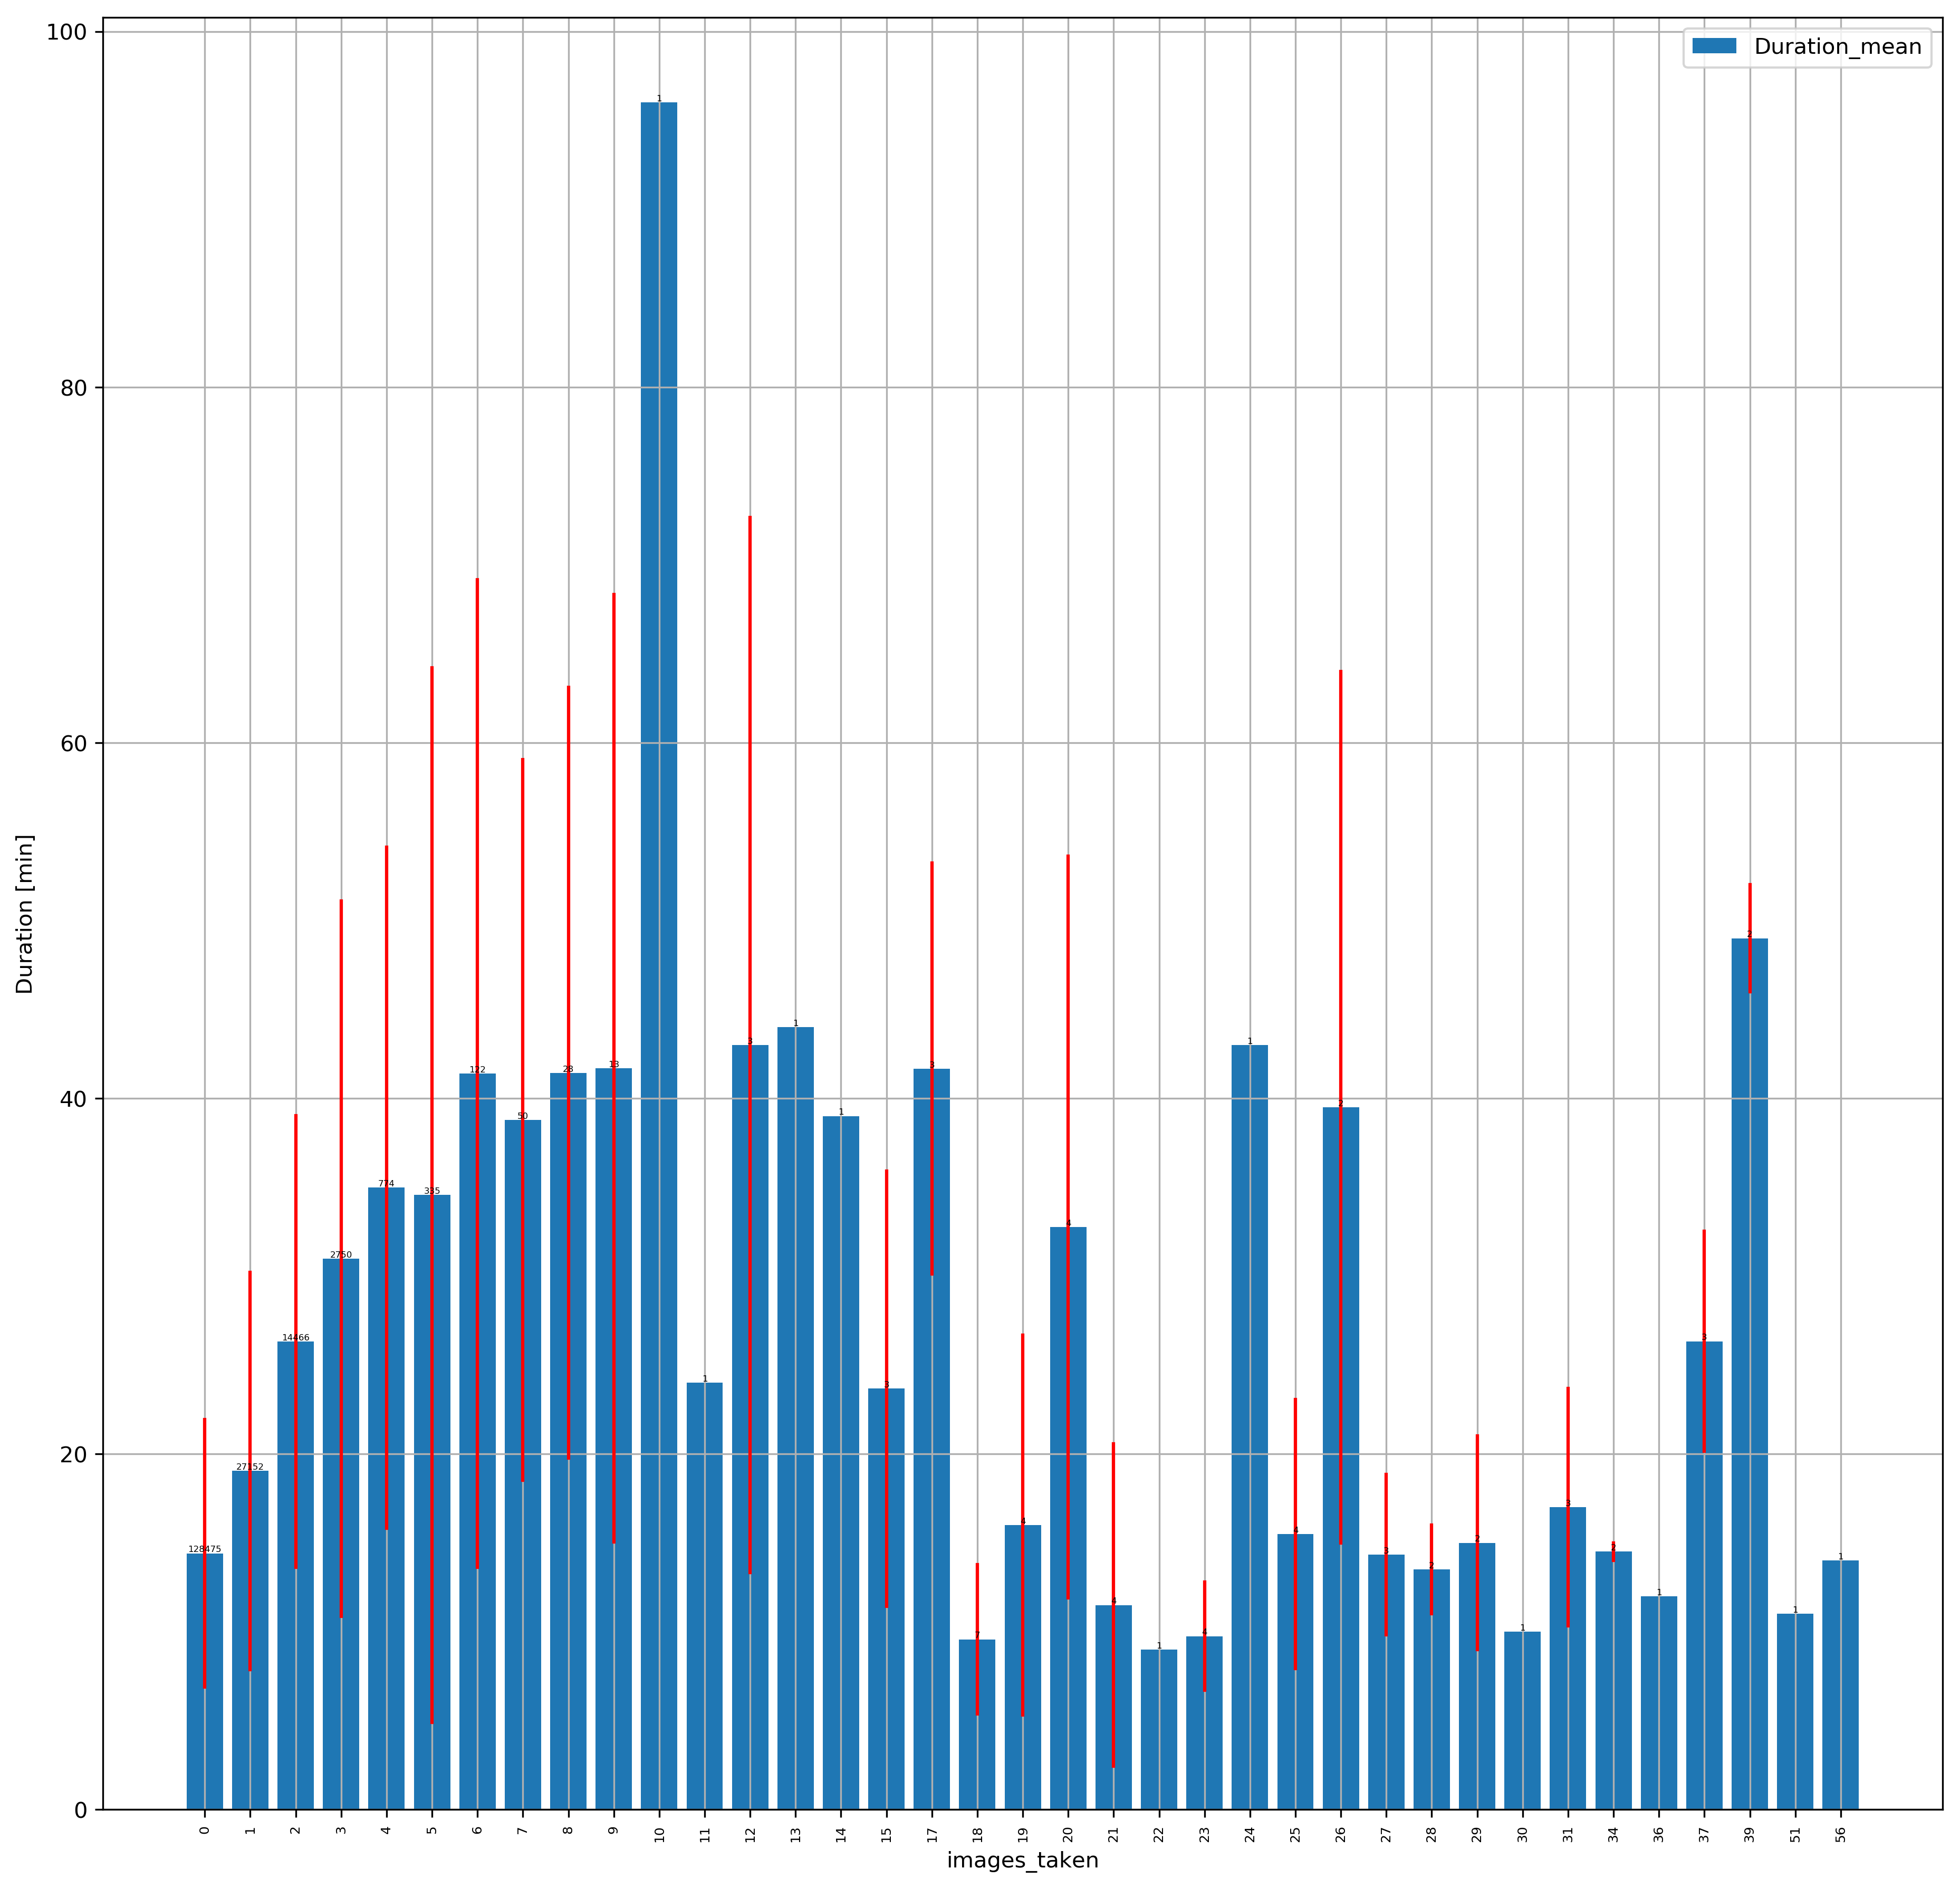

images_taken has finished!




 num_of_fields


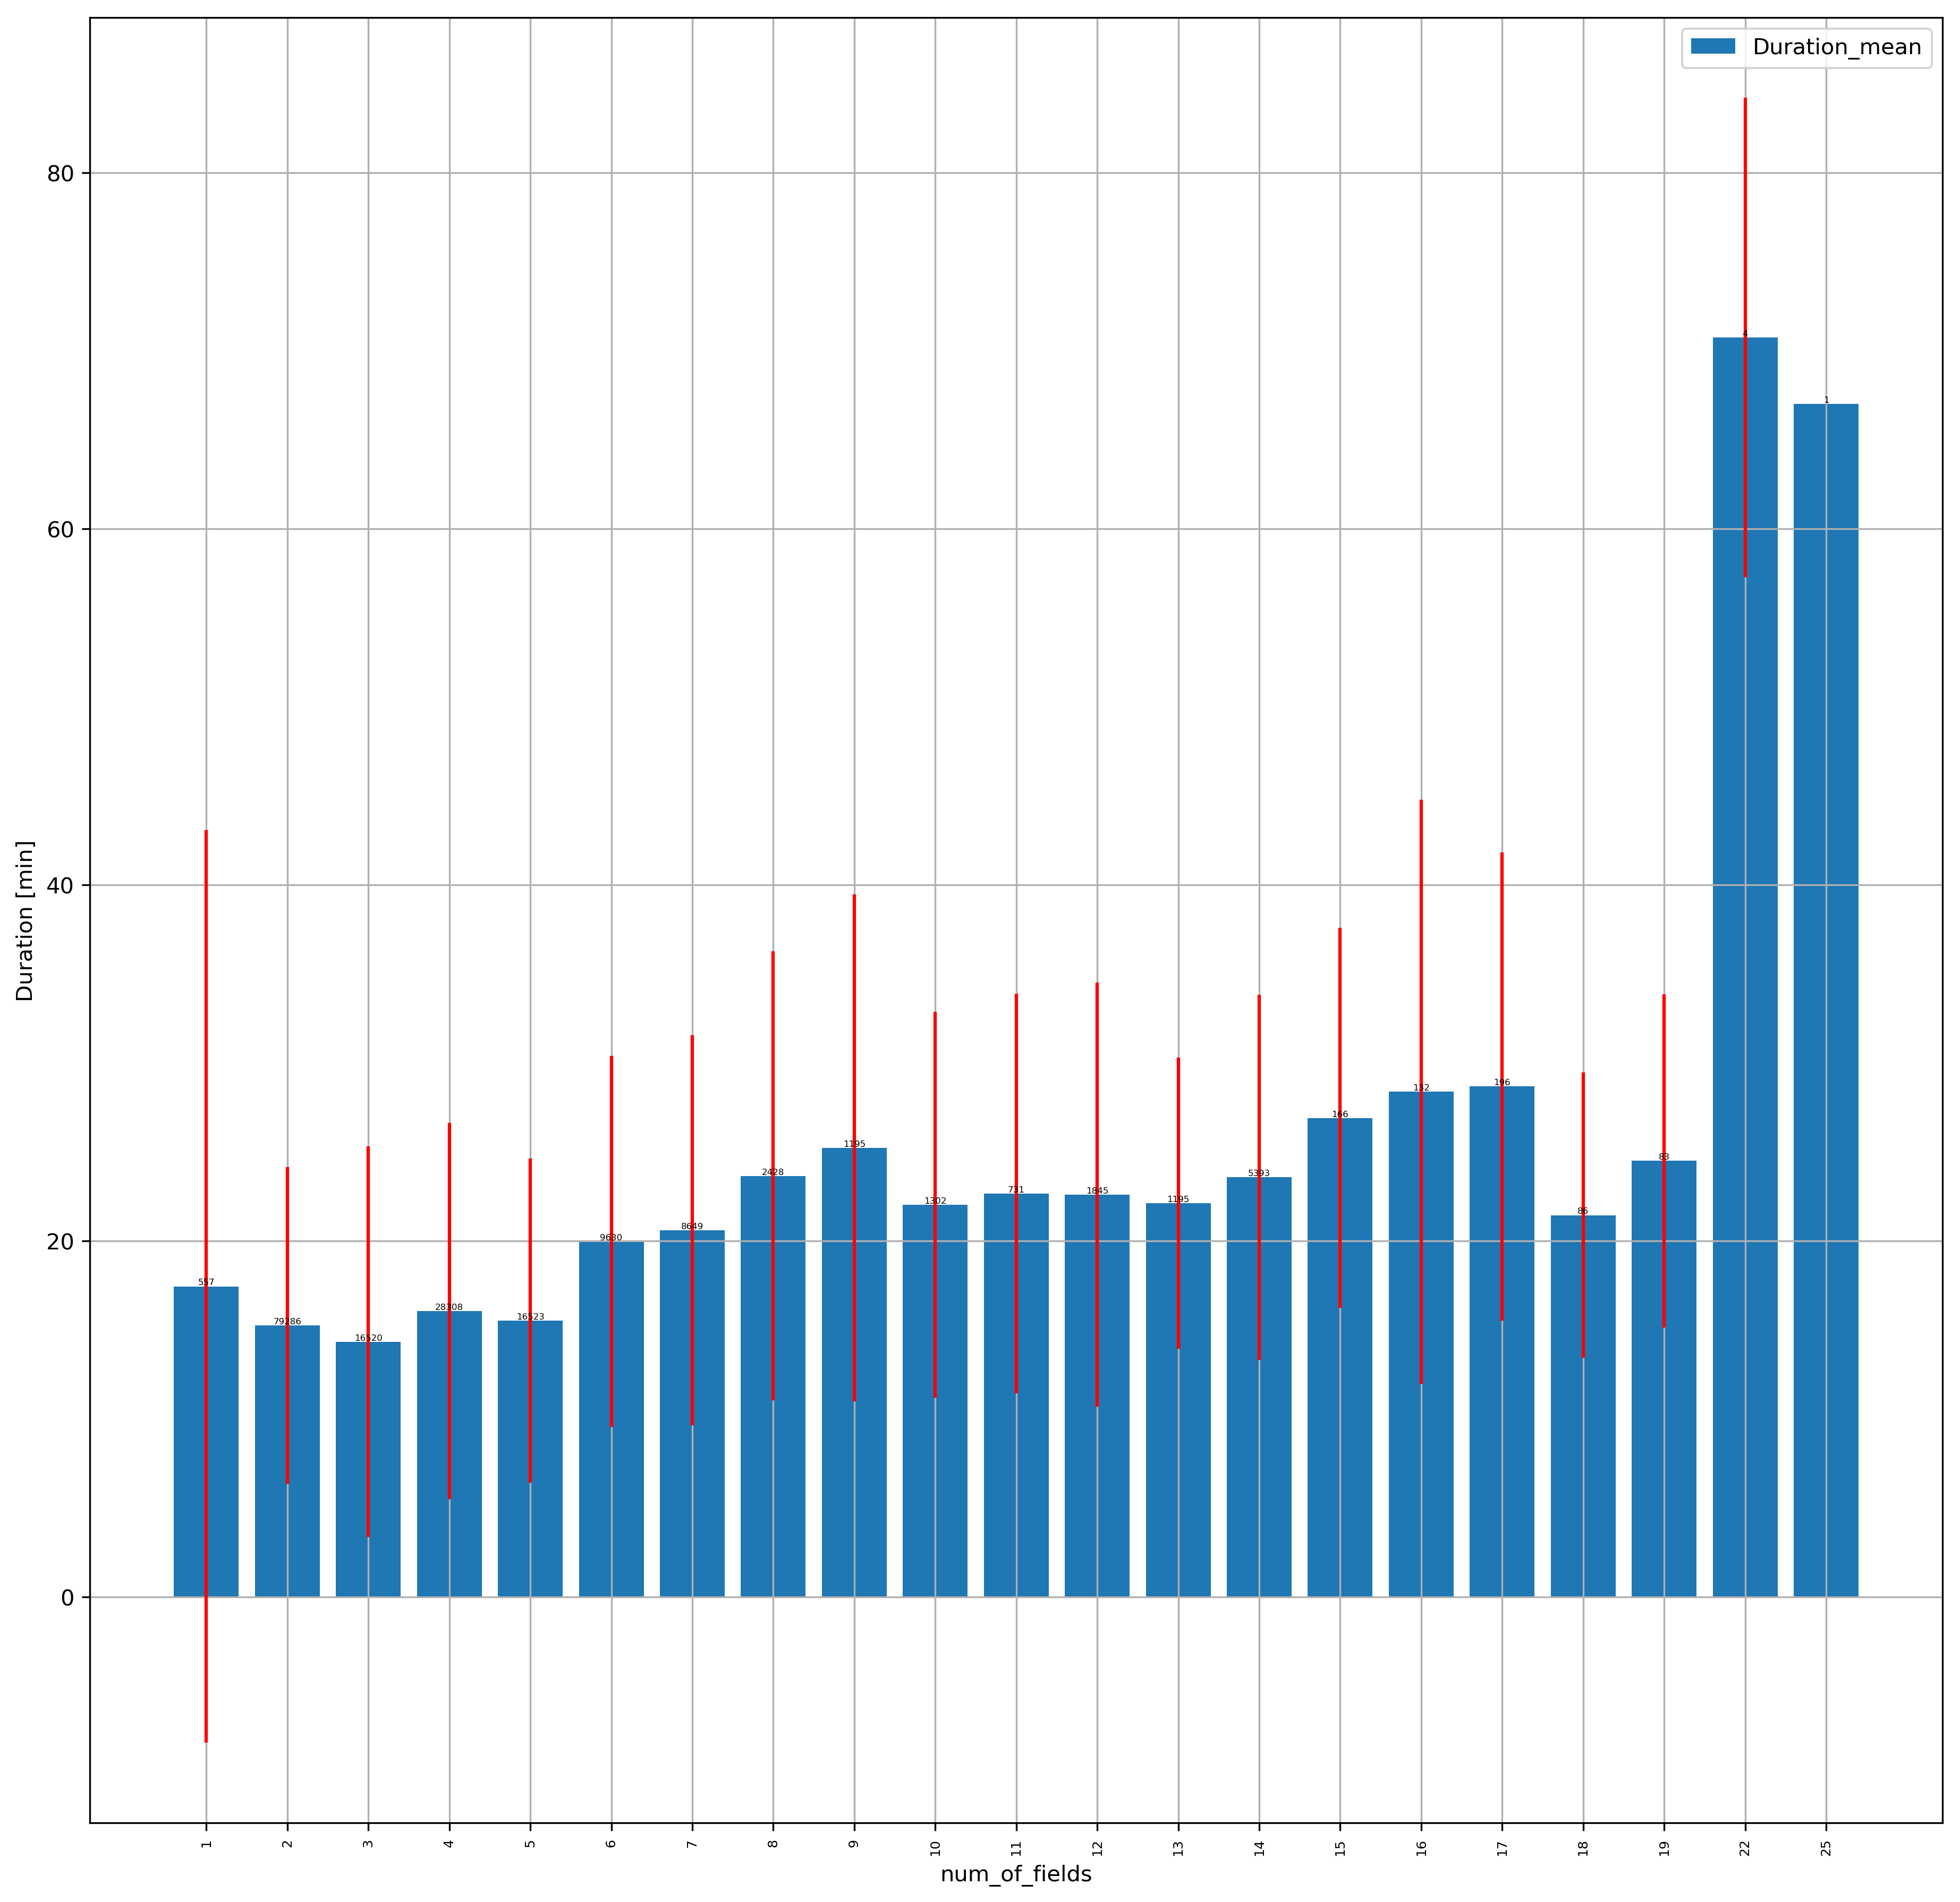

num_of_fields has finished!




 oncologist


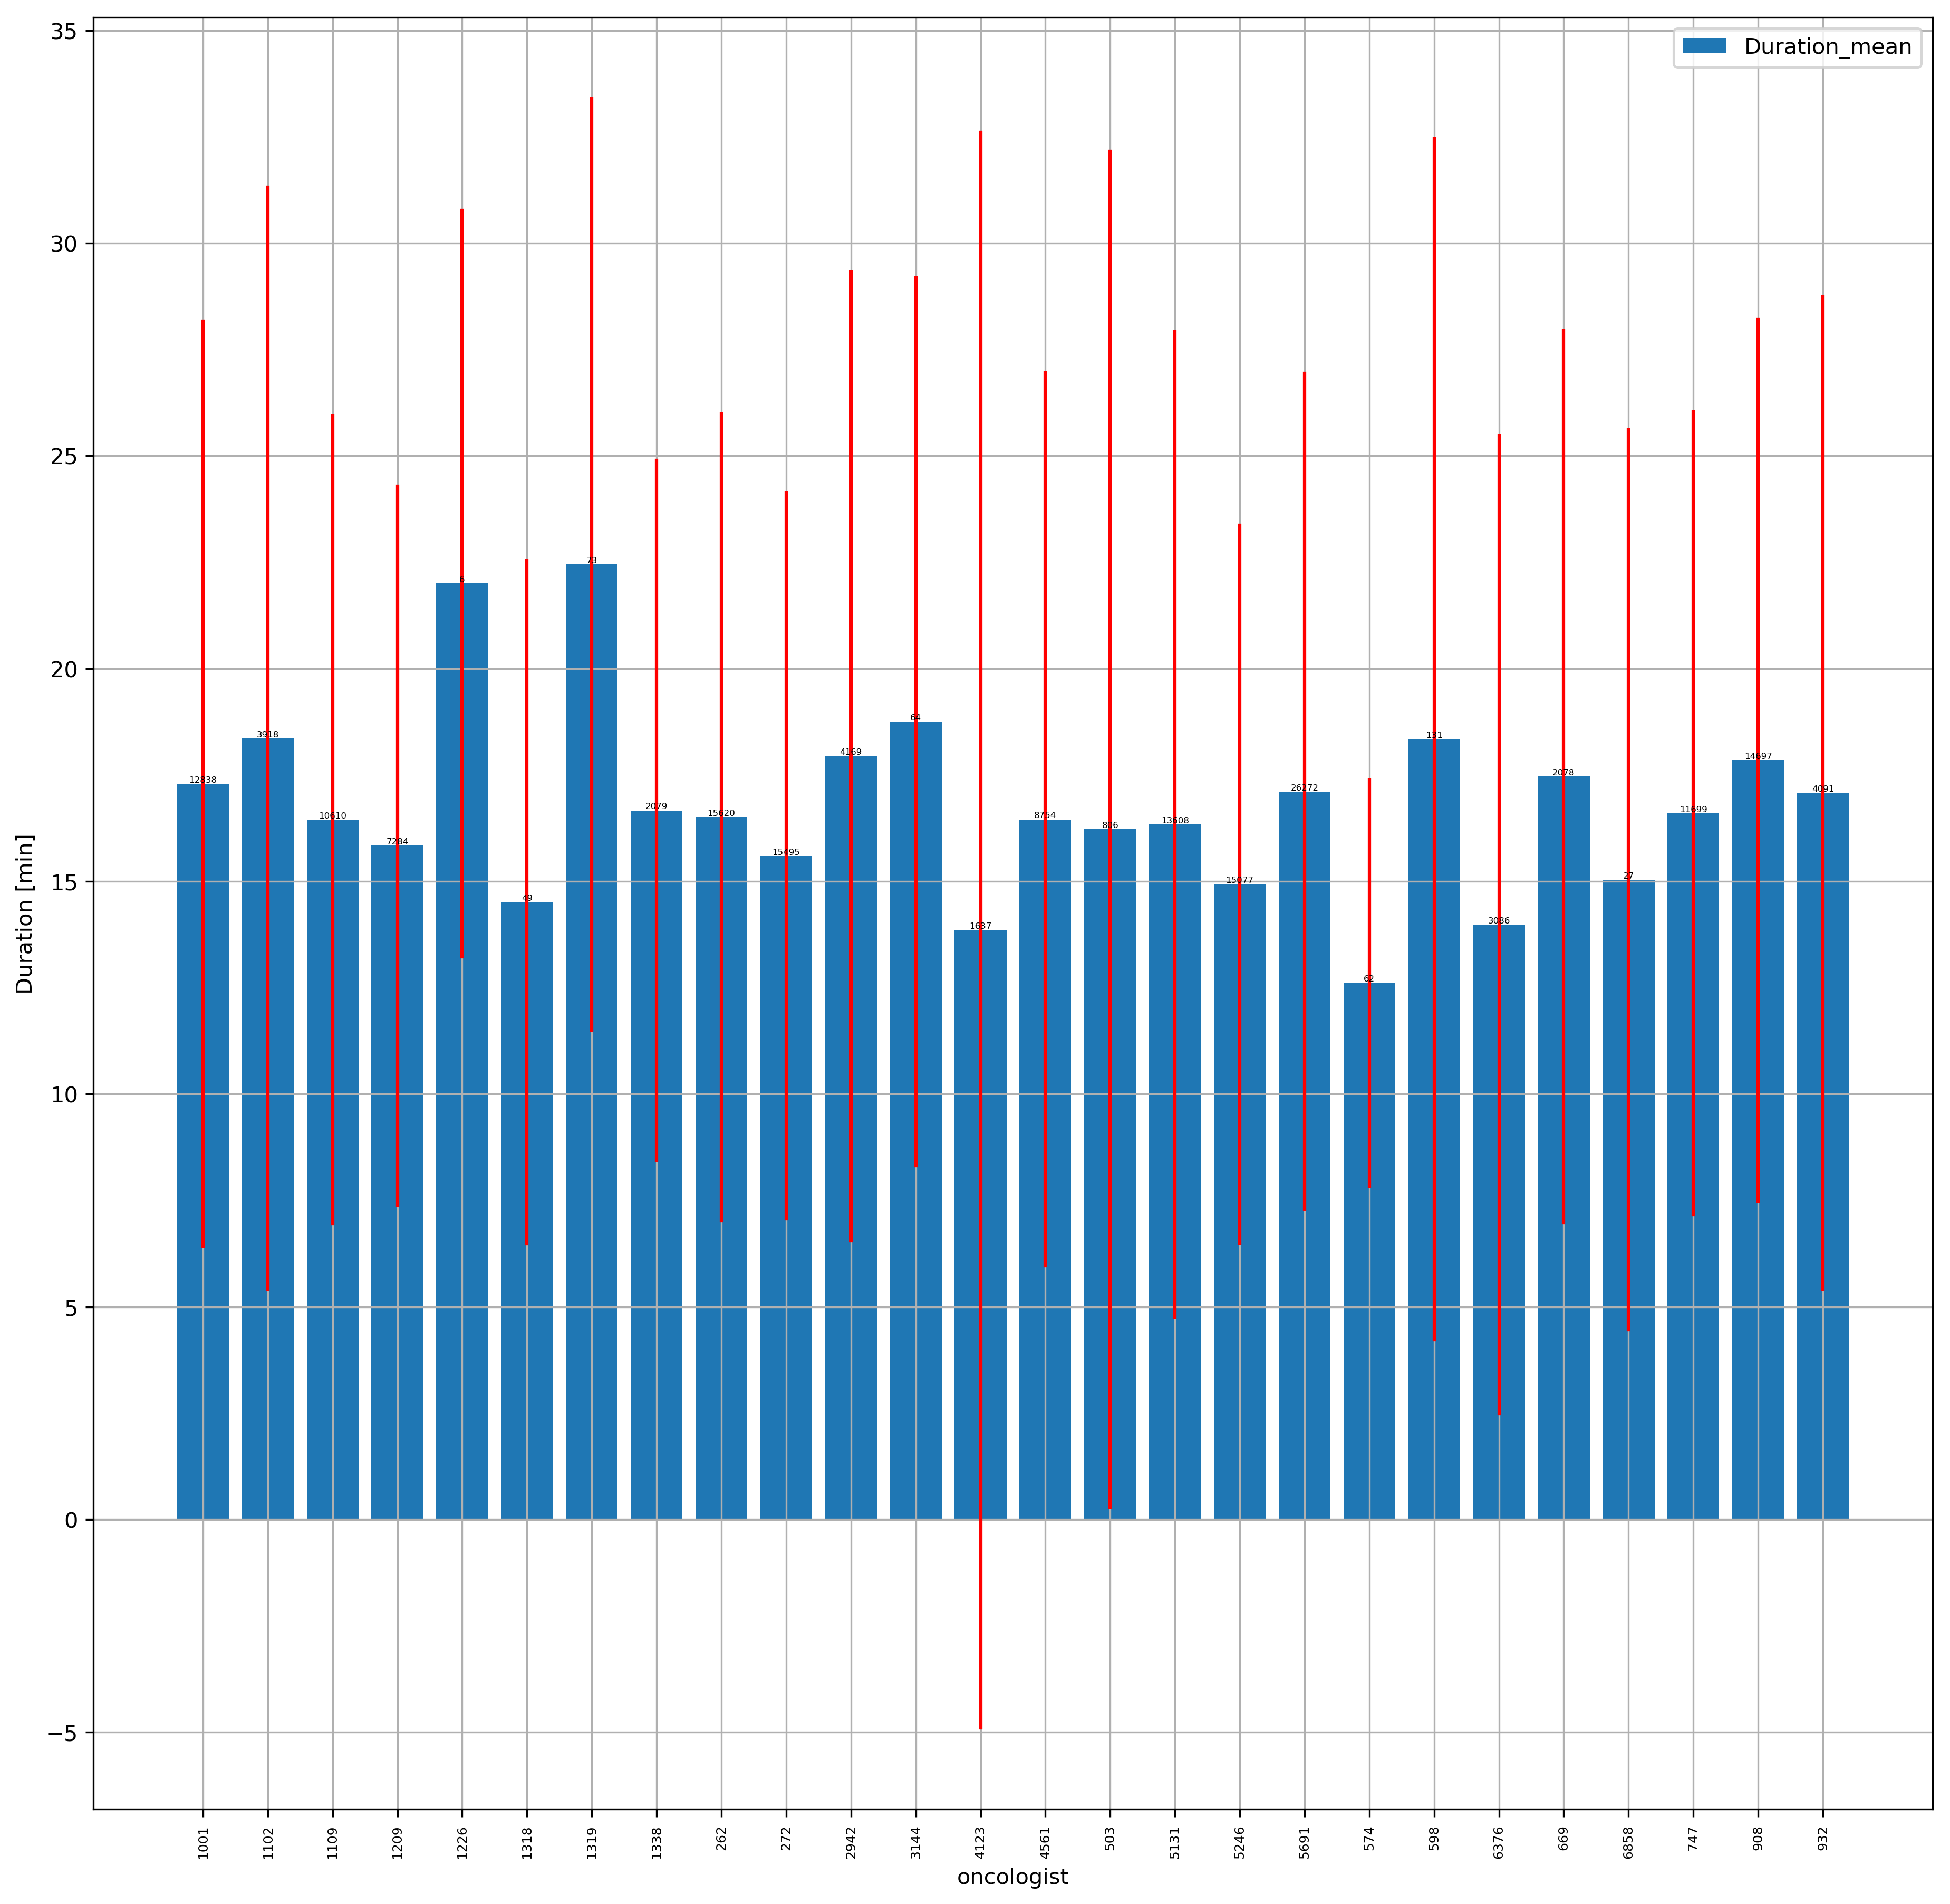

oncologist has finished!




 orientation


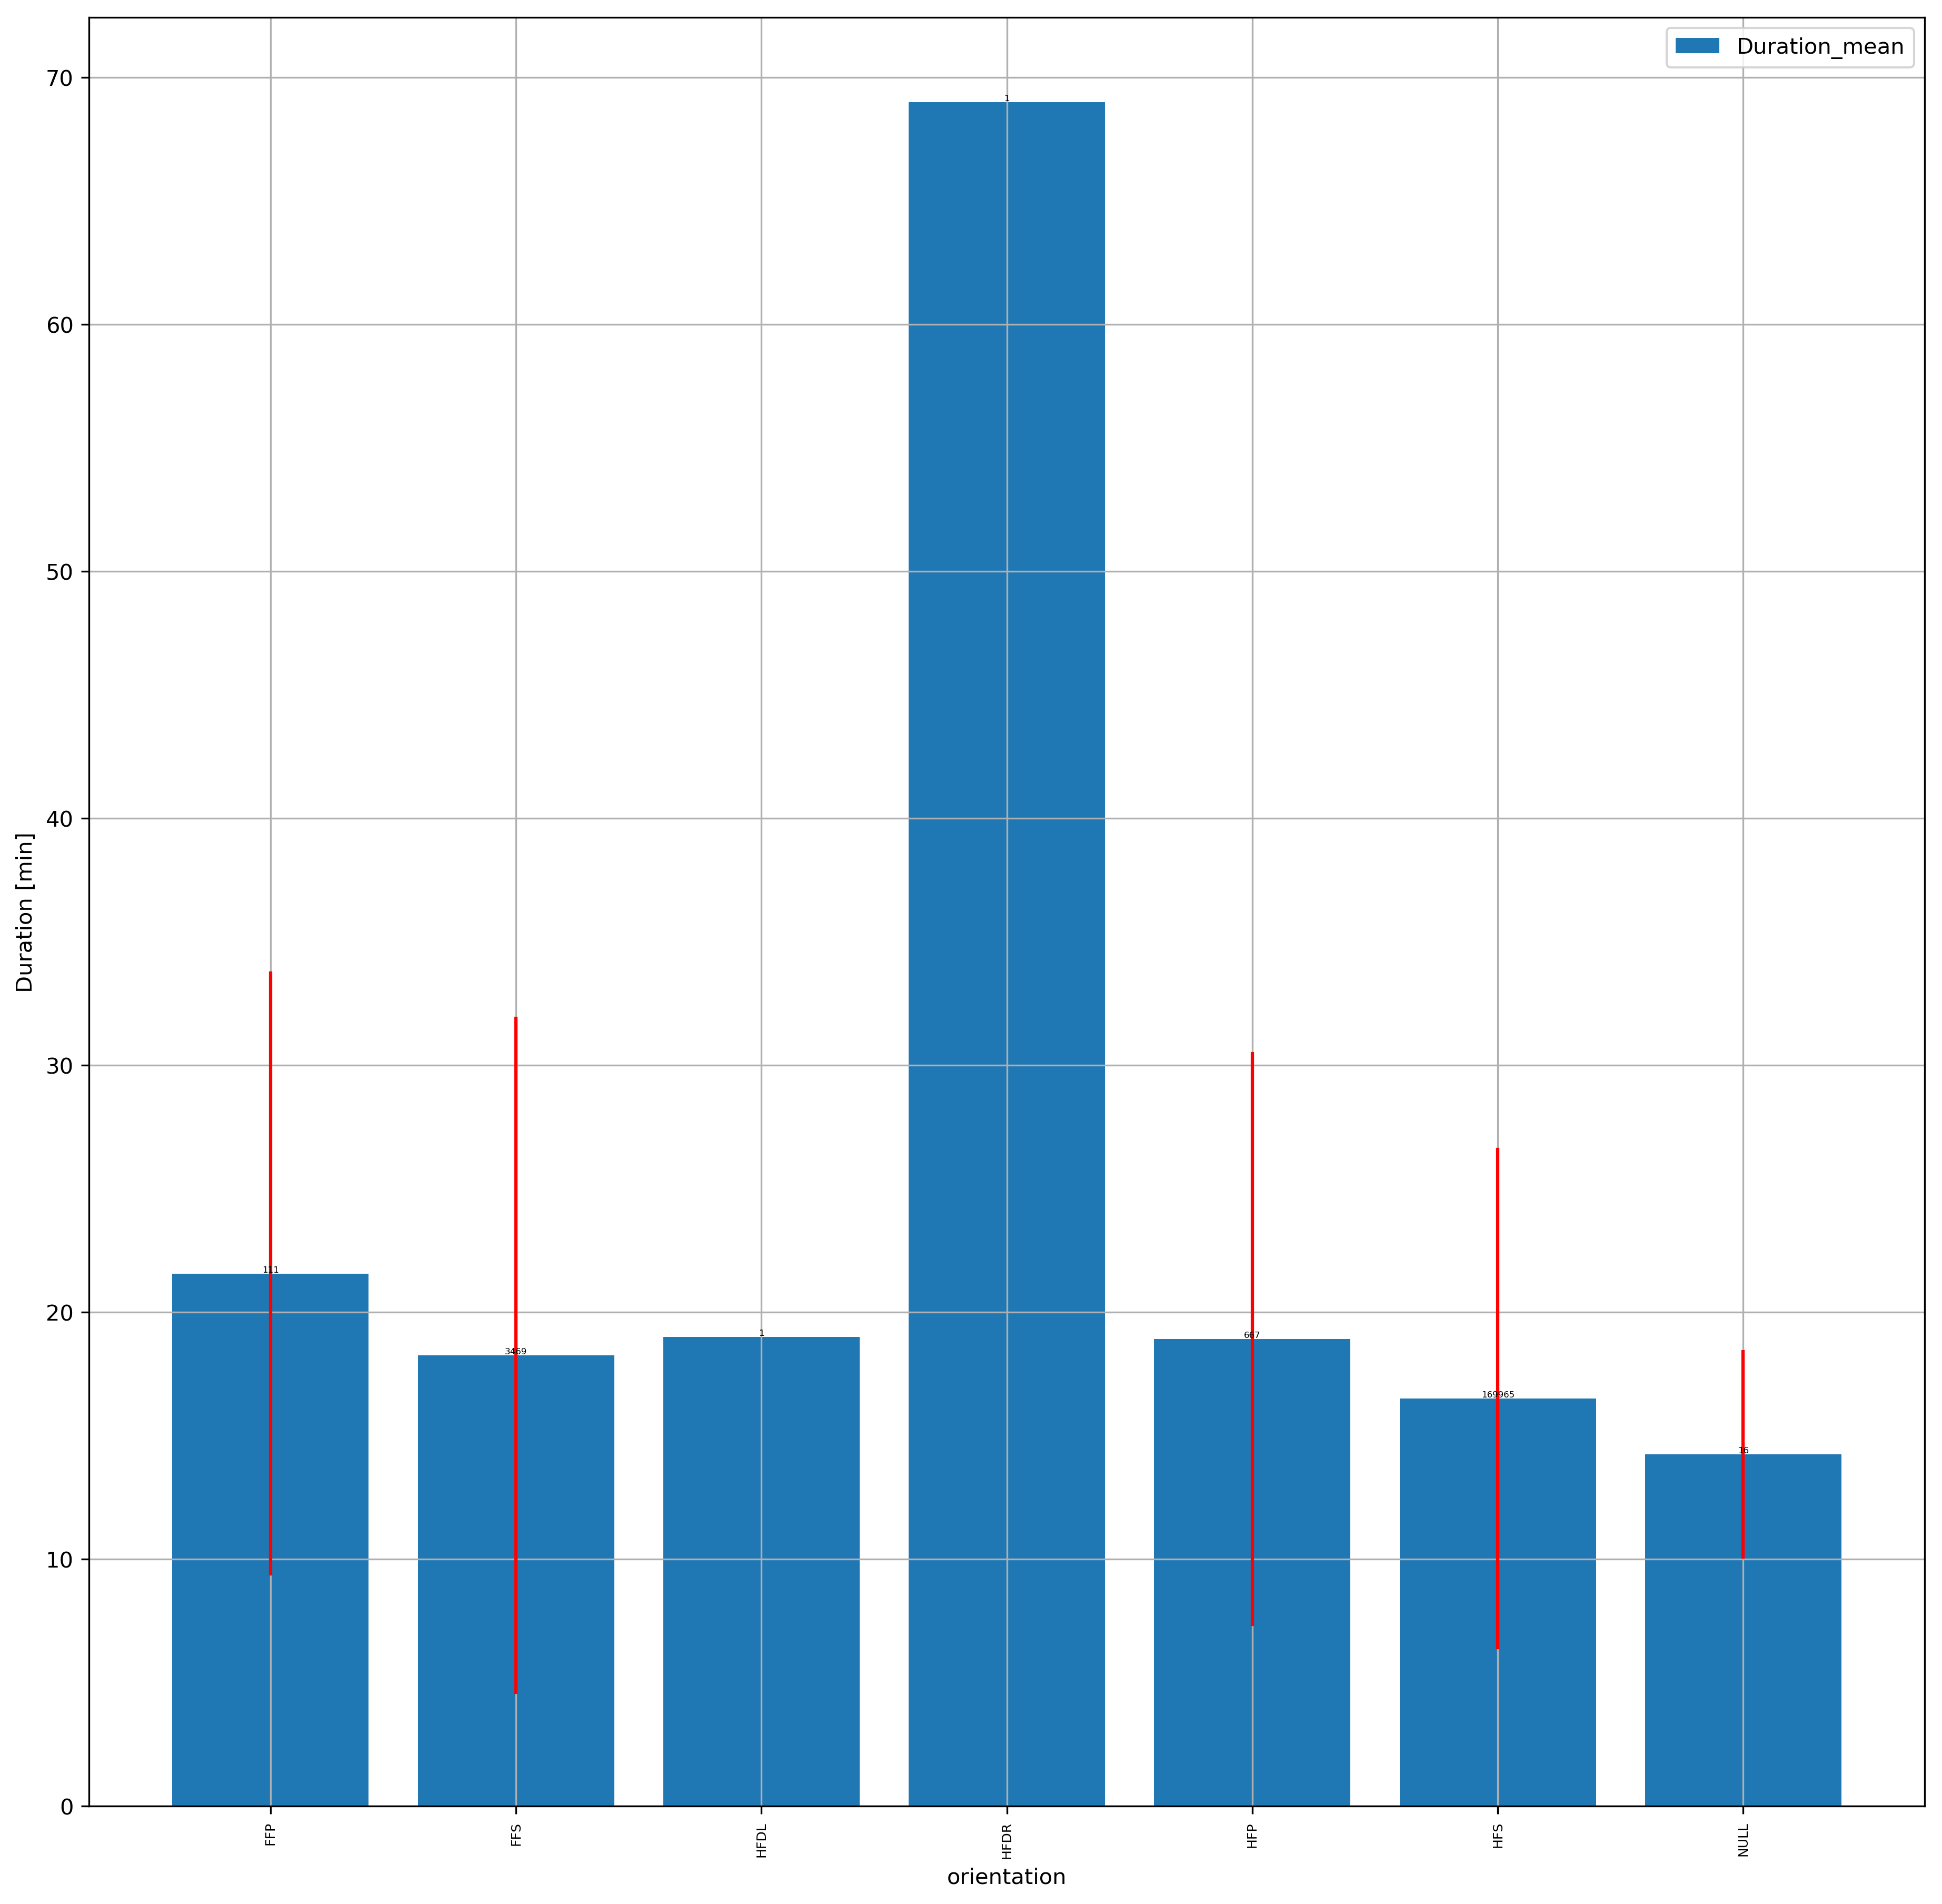

orientation has finished!




 plan
plan has more than 200 different samples!




 prev_duration


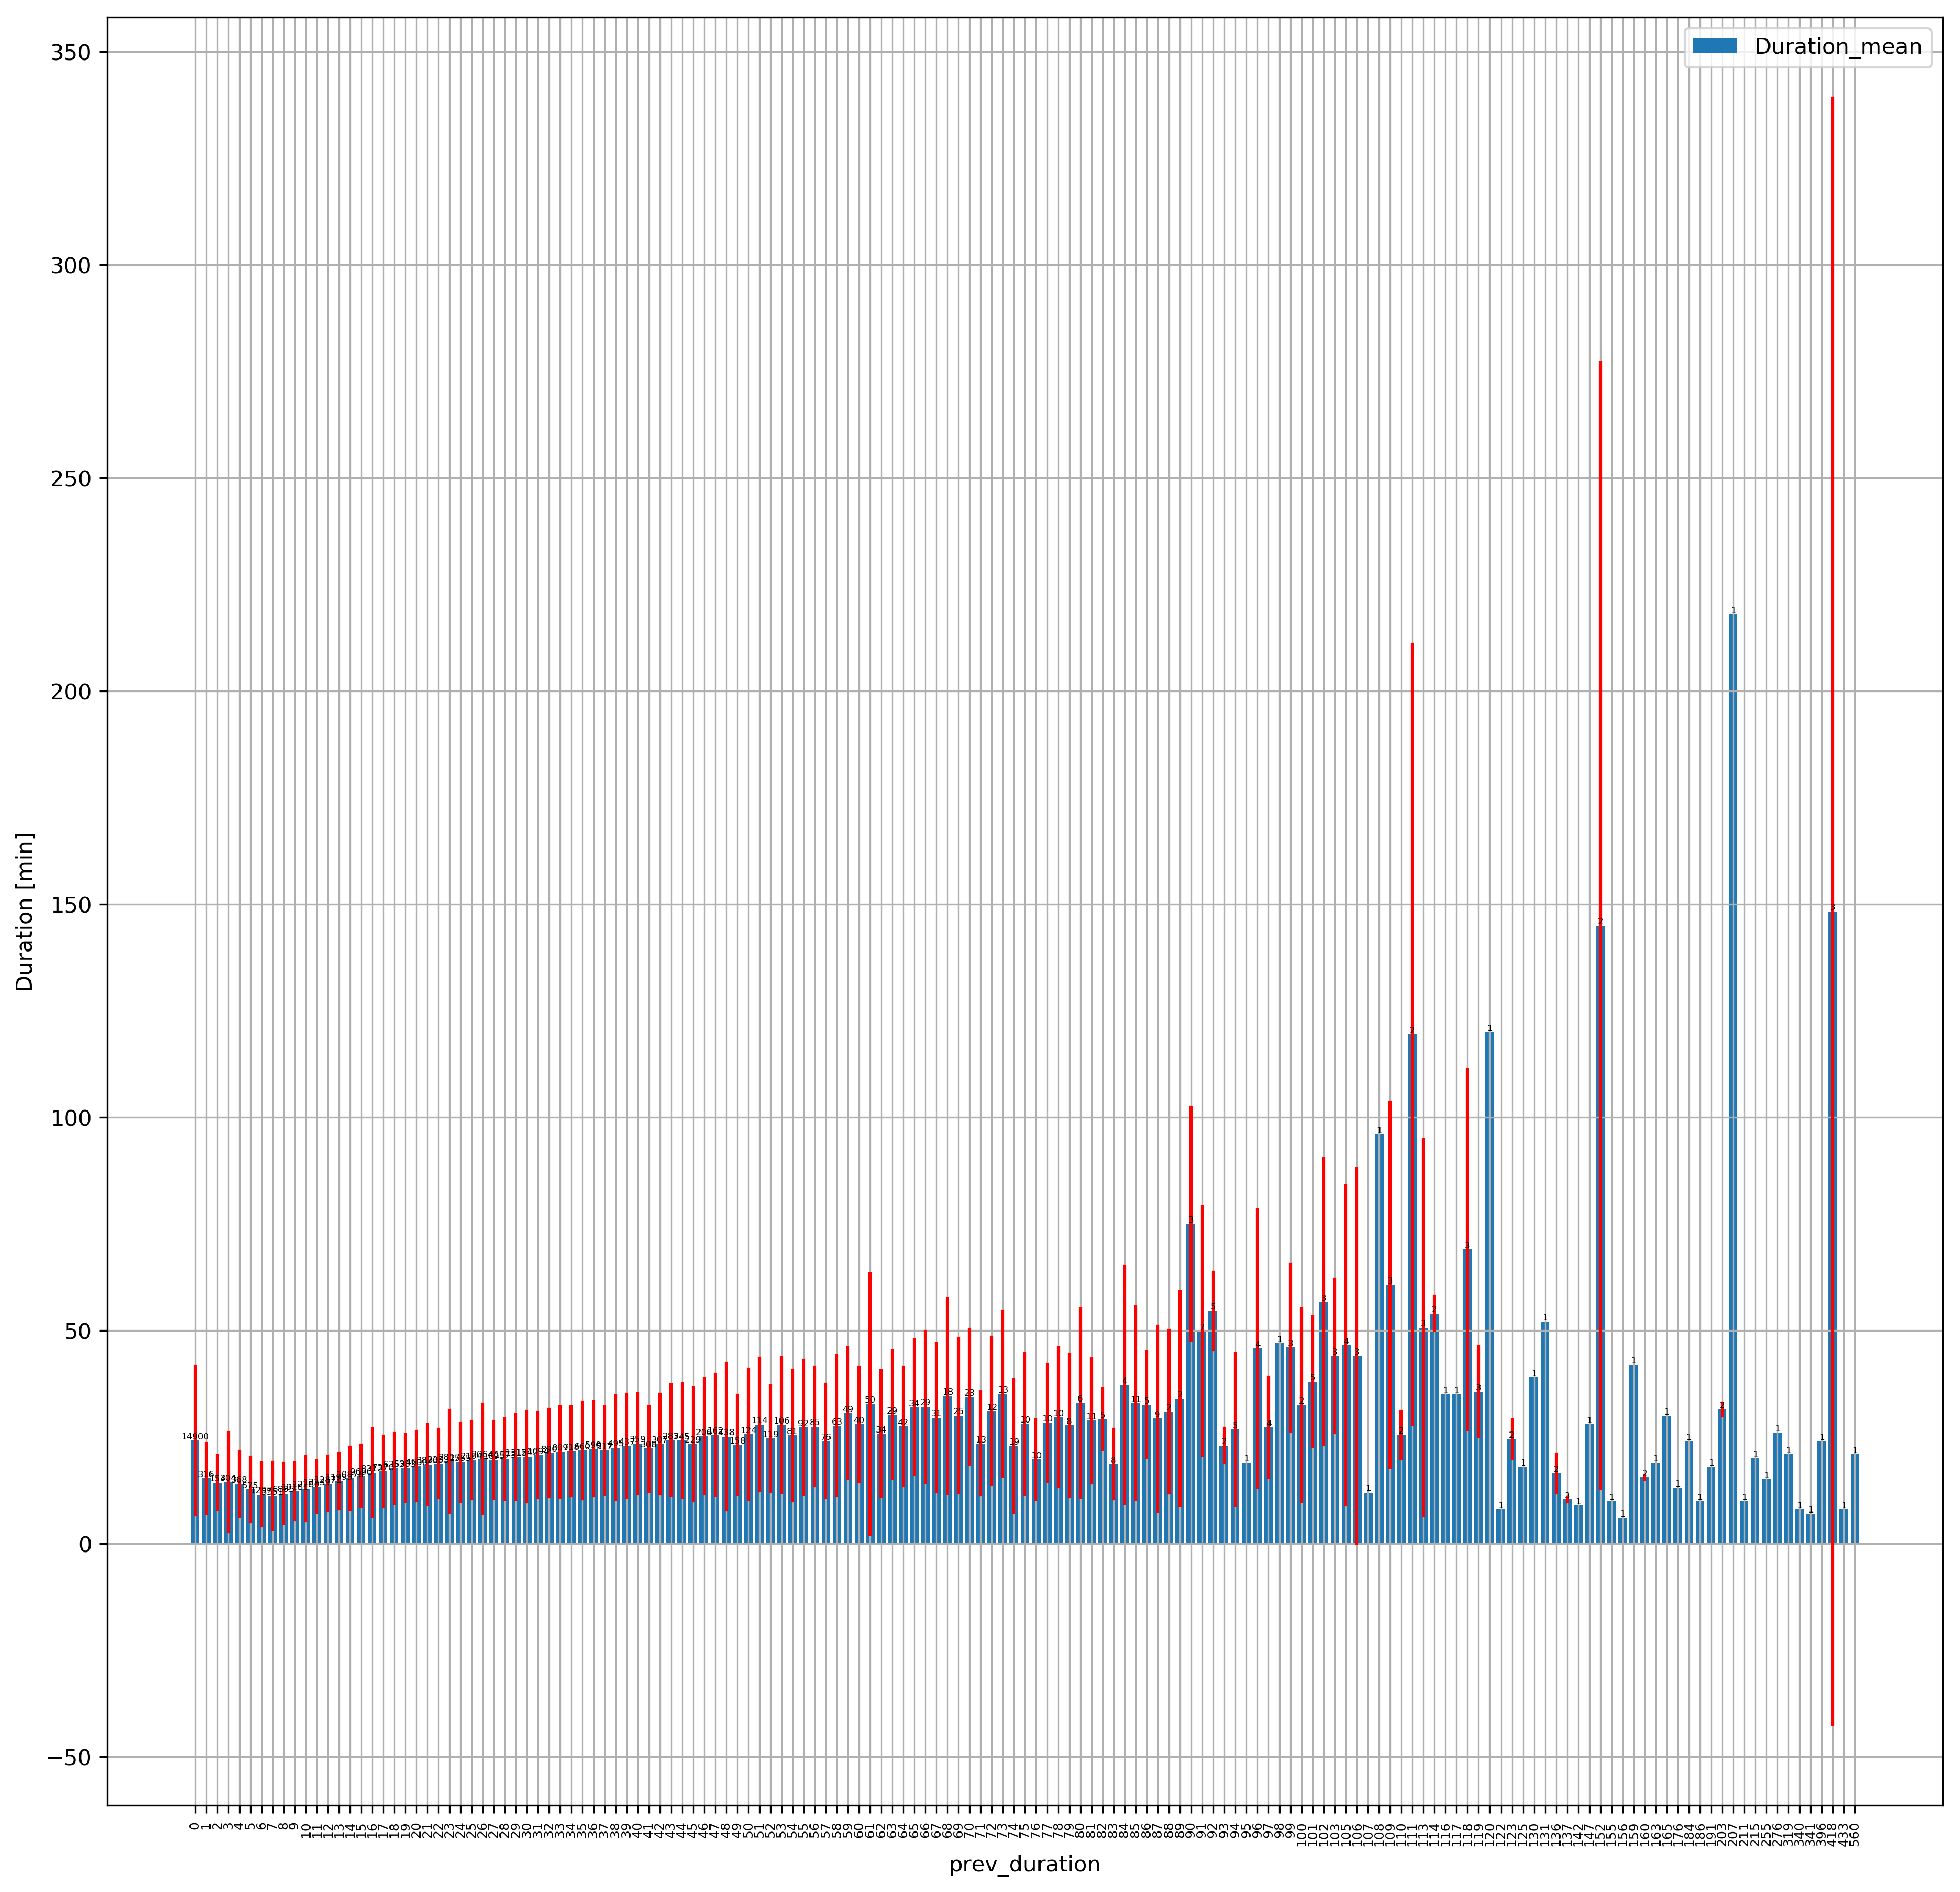

prev_duration has finished!




 radiation_id
radiation_id has more than 200 different samples!




 resource


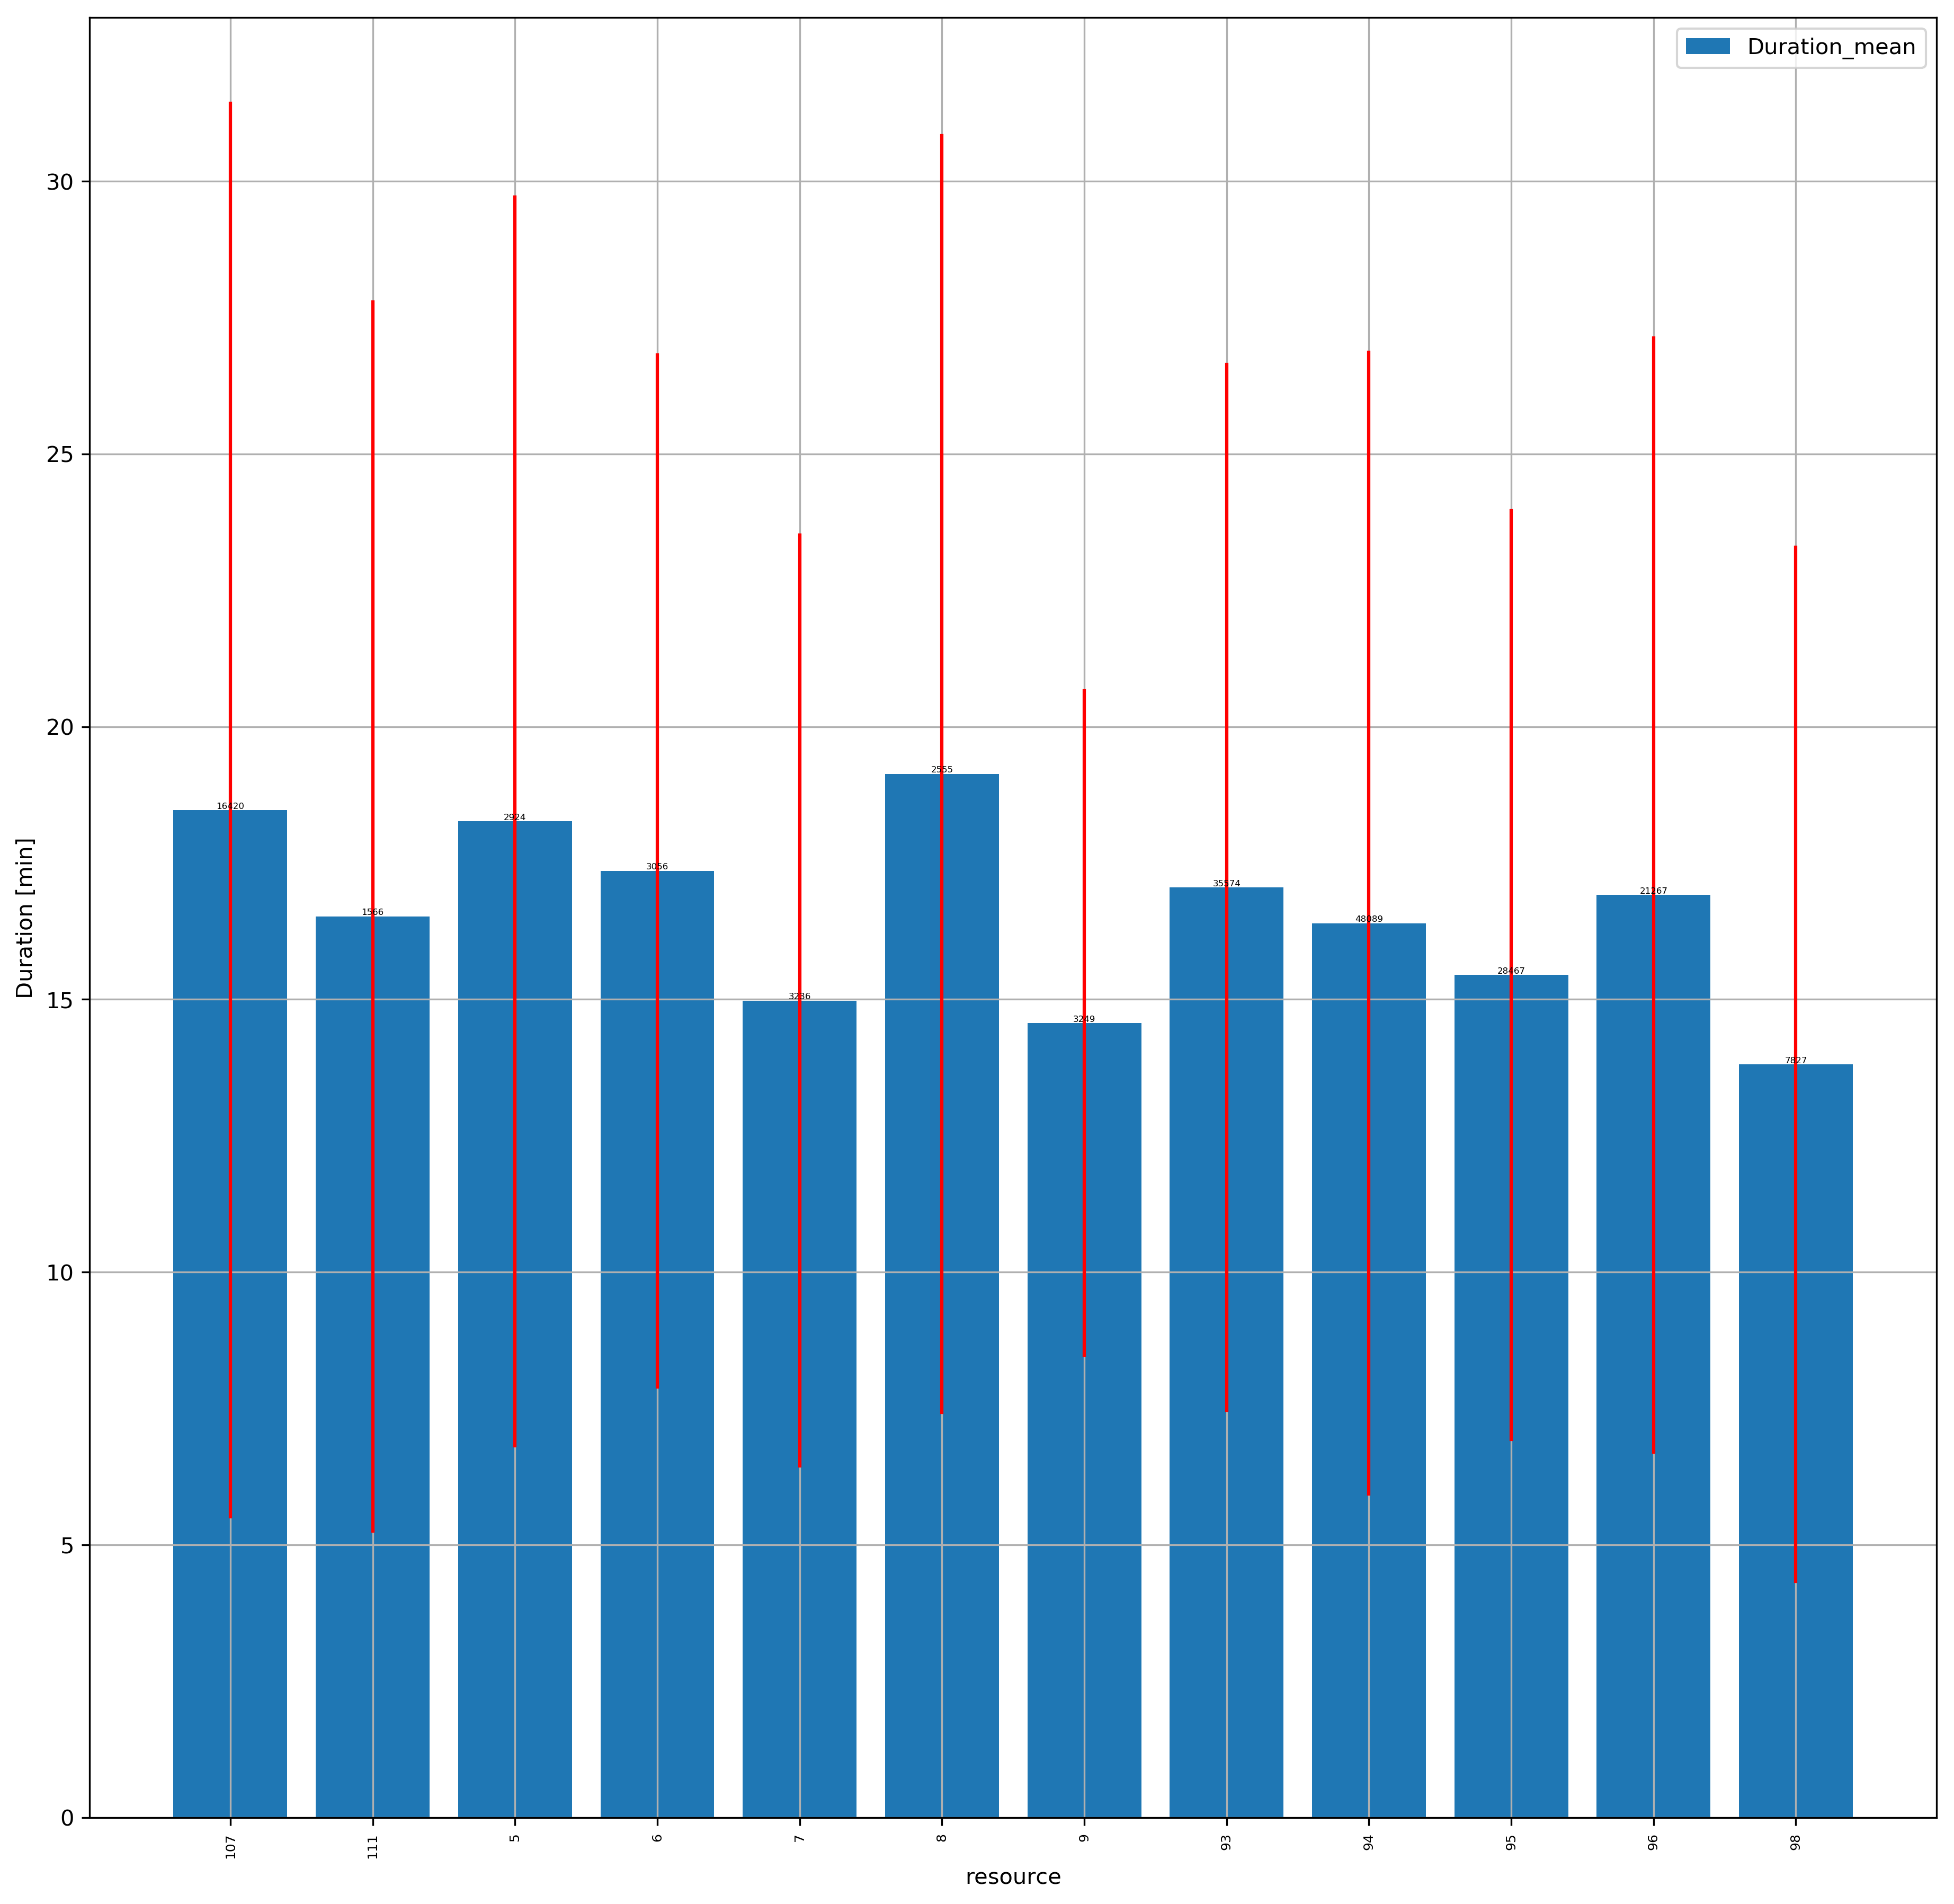

resource has finished!




 therapist


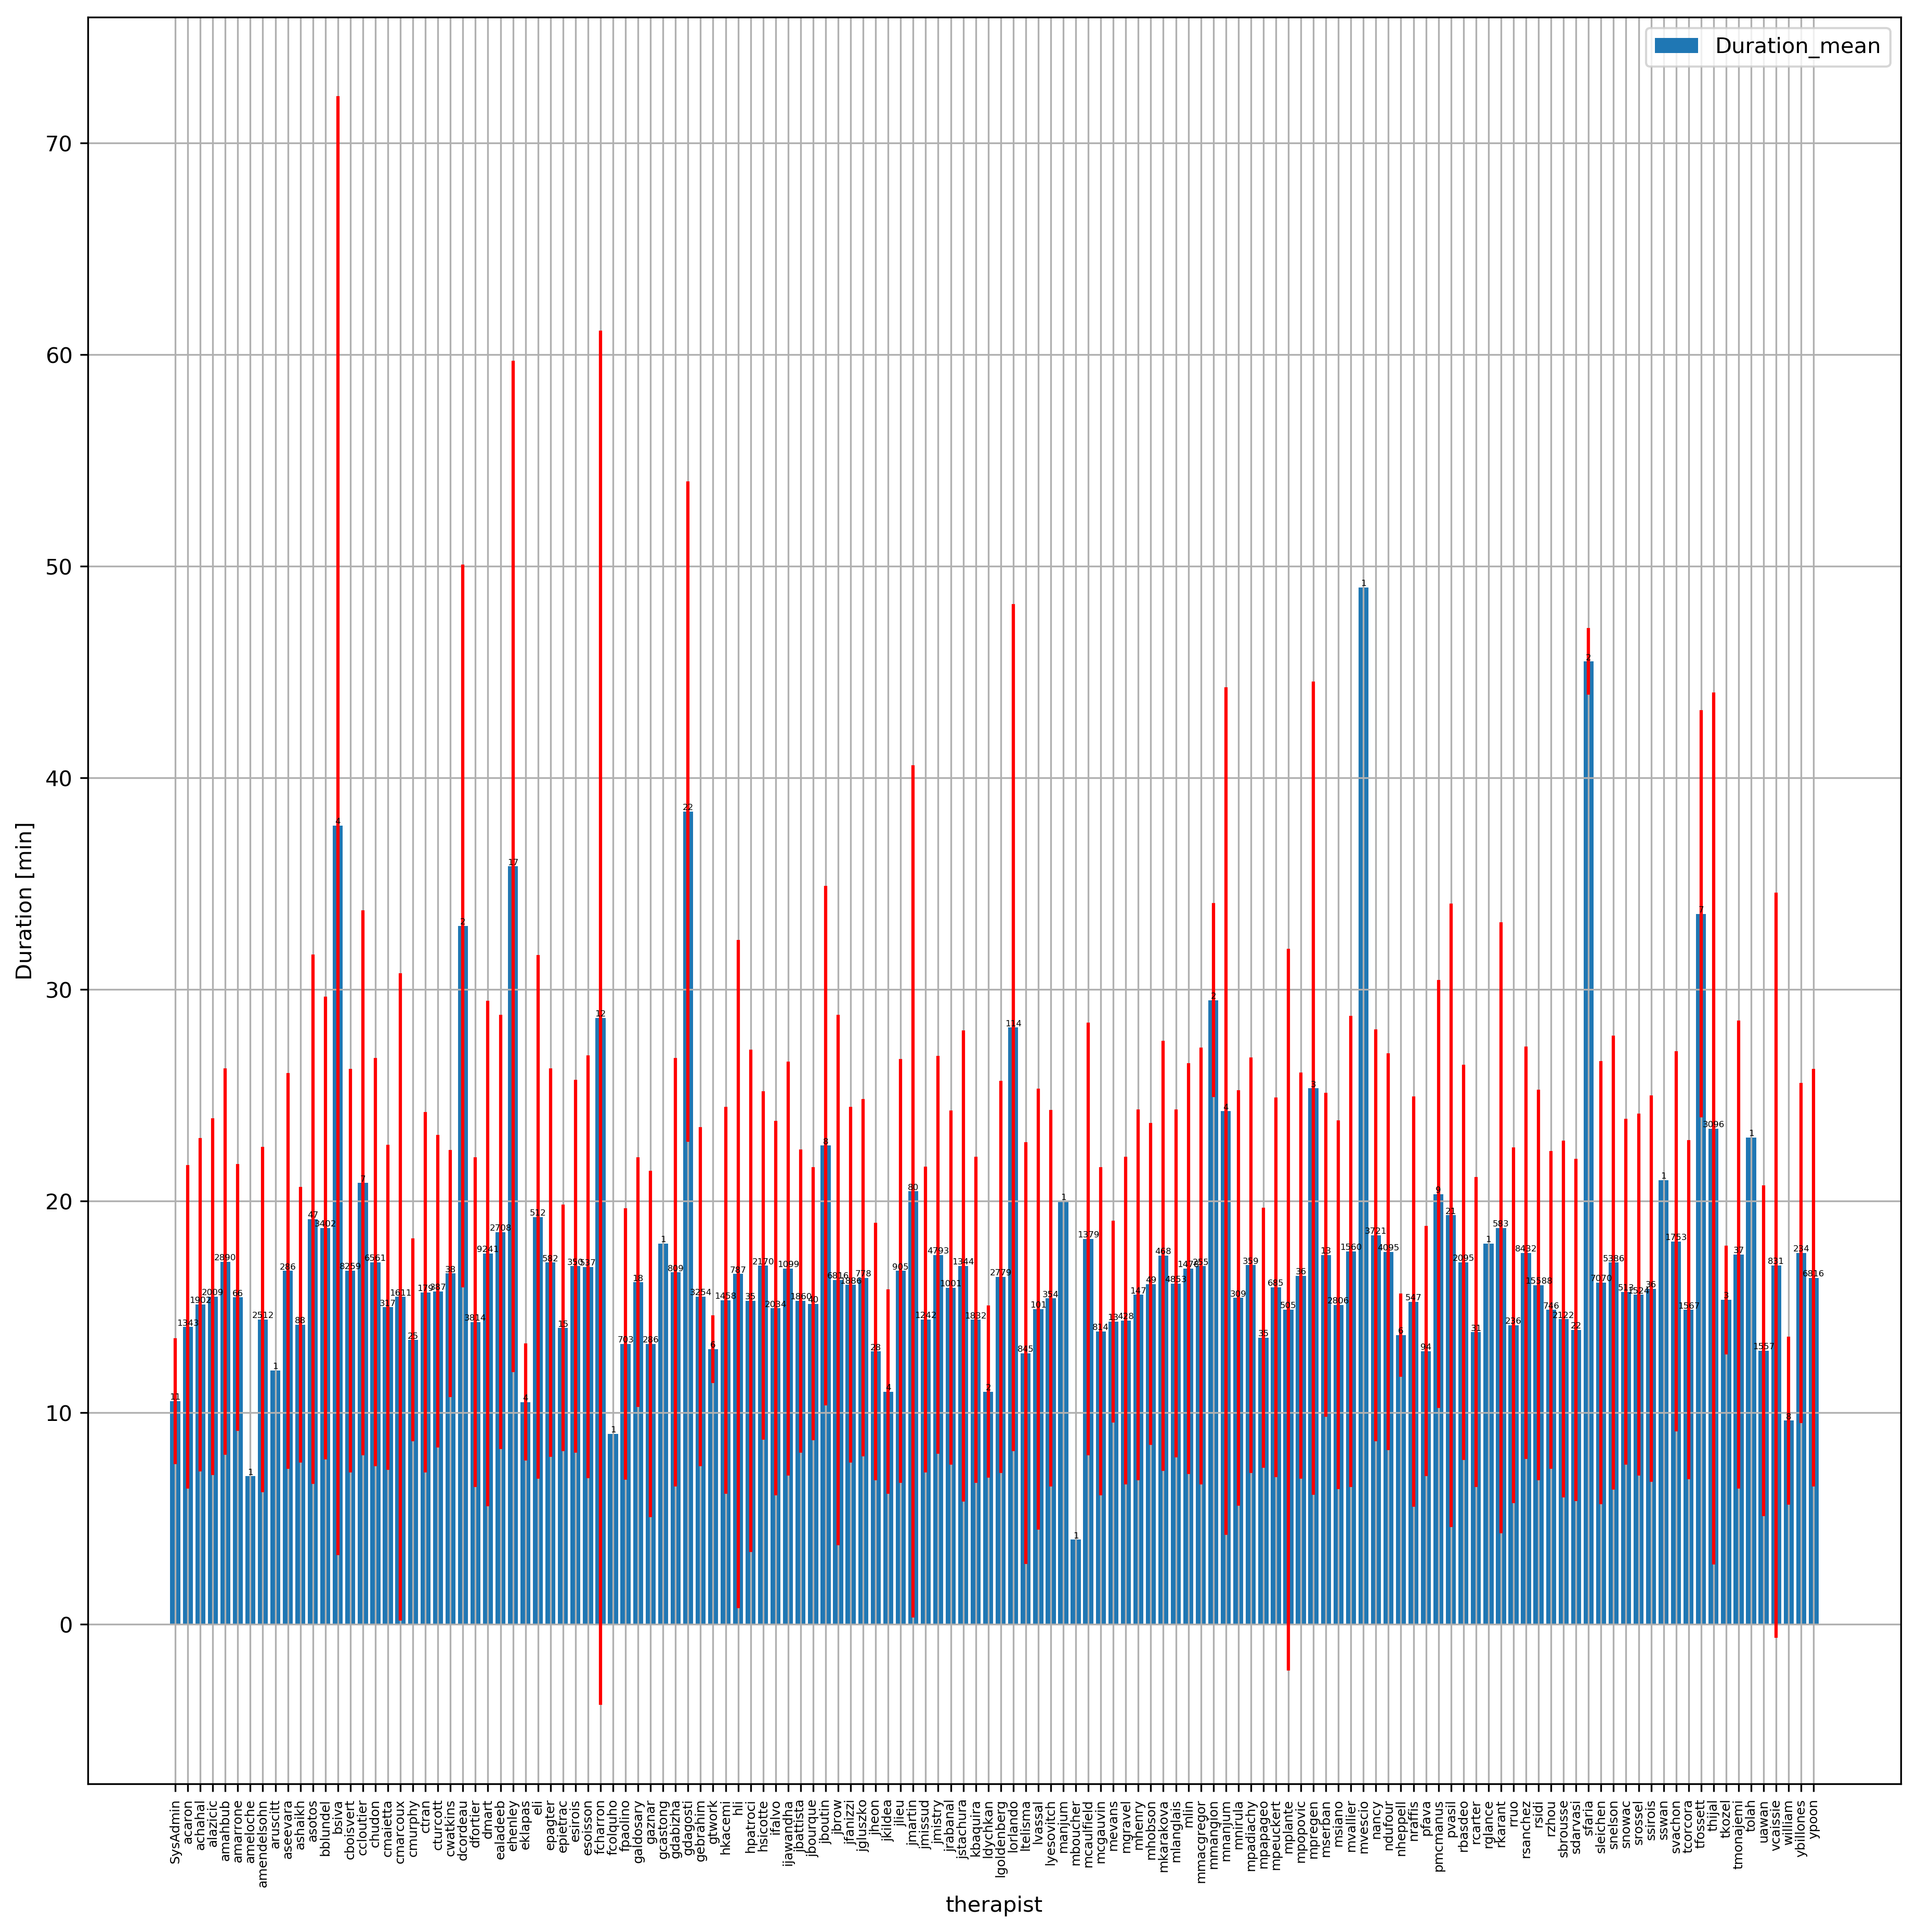

therapist has finished!




 tot_mu
tot_mu has more than 200 different samples!




 tot_mucoeff
tot_mucoeff has more than 200 different samples!


In [18]:
fraction_dict, course_dict, patient_ser, date_list, duration_zero = getBasicFeature(PreInputData)

patient_ser = sorted(list(set(patient_ser)))
date_list = sorted(list(set(date_list)))

fraction_ave, fraction_std, fraction_xticks, fraction_number = getMeanAndStd(fraction_dict)
plotXvsDuration(fraction_ave, fraction_std, fraction_xticks, fraction_number, 'fraction_number')

course_ave, course_std, course_xticks, course_number = getMeanAndStd(course_dict)
plotXvsDuration(course_ave, course_std, course_xticks, course_number, 'course')

all_feature_dict['patient_ser'] = patient_ser
all_feature_dict['date_list'] = date_list
all_feature_dict['fraction_number' + '-key'] = list(fraction_dict.keys())
all_feature_dict['fraction_number' + '-ave'] = fraction_ave
all_feature_dict['fraction_number' + '-std'] = fraction_std
all_feature_dict['course' + '-key'] = list(course_dict.keys())
all_feature_dict['course' + '-ave'] = course_ave
all_feature_dict['course' + '-std'] = course_std

for term in feature:
    print('\n\n\n\n', term)
    feature_dict = getFeatureDict(PreInputData, term)
    feature_ave, feature_std, feature_xticks, feature_number = getMeanAndStd(feature_dict)

    all_feature_dict[term + '-key'] = list(feature_dict.keys())
    all_feature_dict[term + '-ave'] = feature_ave
    all_feature_dict[term + '-std'] = feature_std

    if len(feature_dict) < 200:
        plotXvsDuration(feature_ave, feature_std, feature_xticks, feature_number, term)
        print('%s has finished!'%term)
    else:
        print(term, 'has more than 200 different samples!')

#my_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_feature_dict.items()]))
#my_df.to_csv('Duration_vs_Feature//09-04//Feature_ave_std.csv')